# Team Placeholder
- Nihal Kaul
- Suma Nagral
- Chinmayi Sunku
- Ujjwala Mote

# CMPE-257 Machine Learning -NLP Part3
Evaluating and Contrasting Example Texts with Sentiment Analysis, Topic Modeling, POS Tagging, and Knowledge Graphs against a Benchmark Standard</br>



# Homework

## A. Stats
- Plots: distributions of POS (n, v, adj, adv).
- Compare the dist of POS in each poem.
- Superimpose them on each other in terms of ratios of POS.
- "Gold/reference standard": What did the nominated poems have in common (common denominator)?
- Plot stats.

## B. Topic
- Analyze topics for the prize-winning poems of that year.
- Analyze topics in sampled poems.
- Compare the two.

## C. Sentiment Analysis
- Analyze sentiments for the prize-winning poems of that year.
- Compare the gold std you create against other poems written in that year (e.g., 2018 poems).
- Analyze the deltas: Stats, Topics, Sentiment.
- Write up a narrative that describes your understanding of why these latter poems did not meet the gold standard for that year.

## D. Analyze and Rank the "new" poems relative to the pushcart nominated ones
- Devise a ranking system.
- Compare new poems and some other pushcart nominees with the gold standard to establish a baseline.

### Data Scraping URLs
- https://iowapoetry.com/pushcart2022.htm
- https://www.rattle.com/info/news/
- https://roadrunner.lasierra.edu/nominations-for-the-2022-pushcart-prize/
- https://prolificpulse.blog/2022/10/18/pushcart-nominations-2022/
- https://pulpliterature.com/announcing-pulp-literatures-2022-pushcart-prize-nominees/

The list of abbreviations Part of Speech (POS) tags. Here's an explanation of each of these POS tags:

1. **NN: Noun, singular or mass**
2. **JJ: Adjective**
3. **VBG: Verb, gerund/present participle**
4. **NNS: Noun, plural**
5. **VBN: Verb, past participle**
6. **RB: Adverb**
7. **VB: Verb, base form**
8. **IN: Preposition or subordinating conjunction**
9. **DT: Determiner**
10. **PRP: Personal Pronoun**
11. **CC: Coordinating Conjunction**
12. **VBG: Verb, gerund/present participle**
13. **VBD: Verb, past tense**
14. **NNP: Proper Noun, singular**


In [ ]:
!pip3 install nltk
!pip3 install sentence-transformers
!pip3 install contractions
!pip3 install pandas
!pip install bertopic
!pip install gensim
!pip install pyLDAvis
!pip install spacy
!pip install requests
!pip install pyvis
!pip install beautifulsoup4
!pip install lxml
!pip install fastapi kaleido python-multipart uvicorn
!pip install numpy==1.23.3 pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 25.7 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=173171f0cd0176dc99b76bff829dcf2480b53e21ae3f5651b6fafddc0dee54d1
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.9 MB/

In [ ]:
# # Importing libraries for NLP, web scraping, data analysis, and Google Colab drive mounting.
import requests
import pandas as pd
import bs4 as bs
import urllib.request
import json
import contractions
import re
import nltk
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
from nltk.corpus import stopwords
from transformers import pipeline
from spacy import displacy
from bertopic import BERTopic
import os
from google.colab import drive
import pyLDAvis
import gensim
import spacy
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
from gensim.utils import simple_preprocess
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from gensim import corpora
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import string
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import math
import torch
from pyvis.network import Network
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Downloading necessary NLTK data packages for text processing.
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#**Pushcart Nominated Poems**

In [ ]:
store_loc = "/content/drive/Shareddrives/ML_2023/nlp/pushcart/"

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import os

def scrape_poems(html_content, year):
    soup = BeautifulSoup(html_content, 'html.parser')
    poem_data_list = []

    # Find all <h1> elements which contain author names
    author_elements = soup.find_all('h1')

    # Iterate through the author elements
    for i in range(len(author_elements)):
        author_name = author_elements[i].text.strip()

        # Get the next element after the author
        next_element = author_elements[i].find_next()

        # Initialize poem content and title
        poem_content = ""
        poem_title = ""

        # Continue until the next author element is encountered
        while next_element and next_element.name != 'h1':
            if next_element.name == 'p':
                # Check for and exclude lines containing "IPA Nominees for the 20XX Pushcart Prize"
                if "IPA Nominees for the" in next_element.get_text():
                    break
                if not poem_title:
                    # Set the first line as the title
                    poem_title = next_element.get_text(strip=True)
                else:
                    poem_content += next_element.get_text(strip=True) + "\n"
            next_element = next_element.find_next()

        # Remove '\r' from poem content
        poem_content = poem_content.replace('\r', '').replace('\xa0', '')

        poem_data = {
            "Year": year,
            "Author": author_name,
            "Title": poem_title,
            "Poem": poem_content.strip(),  # Remove extra whitespace
        }

        poem_data_list.append(poem_data)

    return poem_data_list


Run the following code when we want to scrape the poems for nominated pushcart poems. We have done that and stored in a file so reading it from there.

In [ ]:
# Run when we want to scrape the poems for Nominated pushcart poems
nominated_poem_urls = [
    ("https://iowapoetry.com/pushcart2023.htm", 2023),
    ("https://iowapoetry.com/pushcart2022.htm", 2022),
    ("https://iowapoetry.com/pushcart2021.htm", 2021),
]

if not os.path.exists(store_loc):
    os.makedirs(store_loc)

all_poem_data = []

for url, year in nominated_poem_urls:
    response = requests.get(url)
    if response.status_code == 200:
        html_content = response.text
        poem_data_list = scrape_poems(html_content, year)
        all_poem_data.extend(poem_data_list)

# Save the scraped data as a CSV
csv_file_path = os.path.join(store_loc, "Pushcart_nominated_poems.csv")

with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Year', 'Author', 'Title', 'Poem']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(all_poem_data)

print(f"CSV file saved successfully at {csv_file_path}")

CSV file saved successfully at /content/drive/Shareddrives/ML_2023/nlp/pushcart/Pushcart_nominated_poems.csv


Store poems in json fomat


In [ ]:
# List to store poem data in JSON format
data_PN_json = []

# Iterate through the poem data and create JSON objects
for poem_data in all_poem_data:
    poem_json = {
        "Year": poem_data["Year"],
        "Author": poem_data["Author"],
        "Title": poem_data["Title"],
        "Poem": poem_data["Poem"]
    }
    data_PN_json.append(poem_json)

# Save the JSON data to a file
json_file_path = os.path.join(store_loc, "Pushcart_nominated_poems.json")
with open(json_file_path, 'w', encoding='utf-8') as jsonfile:
    json.dump(data_PN_json, jsonfile, ensure_ascii=False, indent=4)

print(f"JSON file saved successfully at {json_file_path}")

JSON file saved successfully at /content/drive/Shareddrives/ML_2023/nlp/pushcart/Pushcart_nominated_poems.json


In [ ]:
data=pd.read_csv(store_loc+'Pushcart_nominated_poems.csv')
data.head(2)

Year              Author                   Title  \
0  2023  Christopher Hunter  LOUISA, AGE 6, AT REST   
1  2023        Susan J Koch                   SOFIA   

                                                Poem  
0  Louisa alighting into placeAlways dazzles me.\...  
1  I cannot disrememberthree carefree boysdraggin...

Cleaning Poem text

In [ ]:
def clean_txt(text):
    text=text.replace(u'\xa0', u' ').replace(r'\r',u'\n').replace(r'\n', ' ').replace('\n', ' ').replace('\t', ' ')
    text = contractions.fix(text)
    text = text.strip().lower()
    text = re.sub(r"'", ' ', text)
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((i, " ") for i in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    text = ' '.join([w for w in text.split() if len(w)>1])
    text = re.sub(' +', ' ', text)
    text = ''.join(text)
    return text

In [ ]:
data['clean_poem'] = data['Poem'].apply(clean_txt)
print(data['Poem'][1])
print(data['clean_poem'][1])

I cannot disrememberthree carefree boysdragging a bear cubthrough Macedonia Square -a ring through itsbloodiednose.
cannot disrememberthree carefree boysdragging bear cubthrough macedonia square ring through itsbloodiednose


In [ ]:
poems = data['clean_poem'].tolist()

In [ ]:
poems_Nominated = data['Poem'].tolist()

In [ ]:
print(poems[0])
print("--------------------")
print(poems_Nominated[0])

louisa alighting into placealways dazzles me she twists with surpassing graceinto an inverted curtsey her arms smoothly interlace as she gets all topsy turvy until in sudden about face she folds her knees and flees
--------------------
Louisa alighting into placeAlways dazzles me.
She twists with surpassing graceInto an inverted curtsey.Her arms smoothly interlace,As she gets all topsy-turvy.Until, in sudden about-face,
She folds her knees,And flees.


Gathering all Parts of Speech (POS) information from every poem and placing it within a 'POS' column in a DataFrame.

In [ ]:
data['POS'] = 1

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocess the poems
preprocessed_corpus = []
for i in range(len(data)):
    # Tokenize the poem
    tokens = nltk.word_tokenize(data['clean_poem'][i])

    # Remove stop words and lemmatize words
    processed_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]

    words = [nltk.word_tokenize(processed_token) for processed_token in processed_tokens]

    # Tag the parts of speech for each word
    data['POS'][i] = [nltk.pos_tag(word) for word in words]

In [ ]:
data.head(3)

Year              Author                   Title  \
0  2023  Christopher Hunter  LOUISA, AGE 6, AT REST   
1  2023        Susan J Koch                   SOFIA   
2  2023       John Mitchell             NICHOLAS II   

                                                Poem  \
0  Louisa alighting into placeAlways dazzles me.\...   
1  I cannot disrememberthree carefree boysdraggin...   
2  The ghost of the Tsar walks.He passes some Jew...   

                                          clean_poem  \
0  louisa alighting into placealways dazzles me s...   
1  cannot disrememberthree carefree boysdragging ...   
2  the ghost of the tsar walks he passes some jew...   

                                                 POS  
0  [[(louisa, NN)], [(alighting, VBG)], [(placeal...  
1  [[(disrememberthree, NN)], [(carefree, NN)], [...  
2  [[(ghost, NN)], [(tsar, NN)], [(walk, NN)], [(...

# A.Stats

## Create binary graphs for each poem using networkx.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from itertools import combinations

# If you haven't already, make sure to download the stopwords dataset from NLTK
# import nltk
# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def plot_binary_graph(poem_text, distance=5):
    # Tokenize the text into words (you might need to preprocess the text further)
    # and remove common words
    words = [word for word in poem_text.lower().split() if word not in stop_words]

    # Create an empty graph
    G = nx.Graph()

    # Add words as nodes to the graph
    G.add_nodes_from(words)

    # Add edges between words that are close to each other
    # Only connect words that are within a certain 'distance' in the text
    for word1, word2 in combinations(words, 2):
        if abs(words.index(word1) - words.index(word2)) < distance:
            G.add_edge(word1, word2)

    # Draw the graph with a layout that spaces out the nodes more
    pos = nx.spring_layout(G, k=0.1, iterations=20)  # k is the optimal distance between nodes
    nx.draw(G, pos, with_labels=True, node_color='red', font_color='blue', node_size=30, width=0.1)
    plt.show()



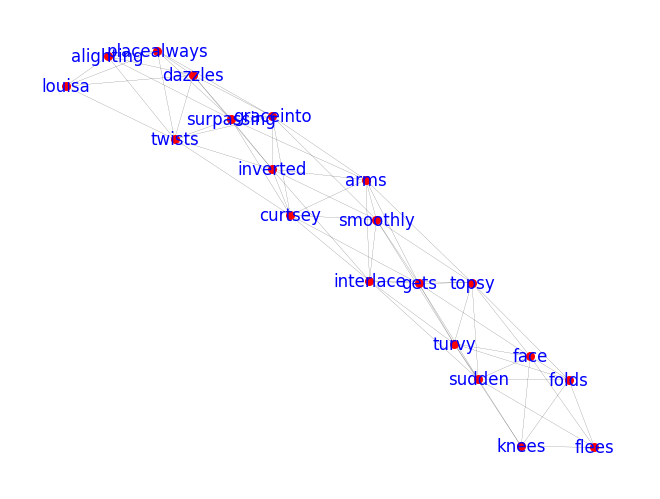

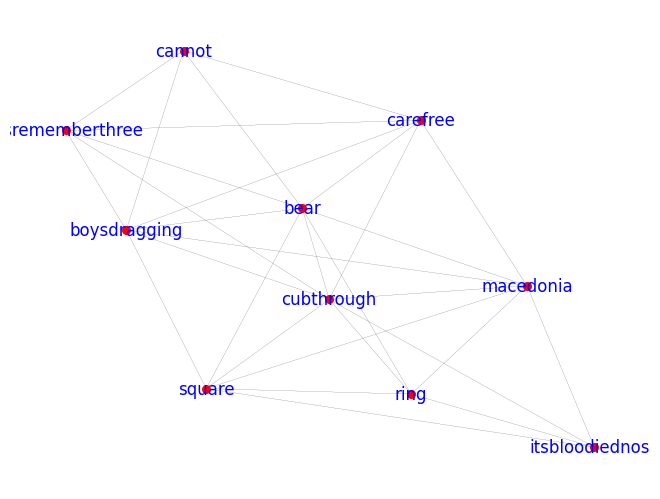

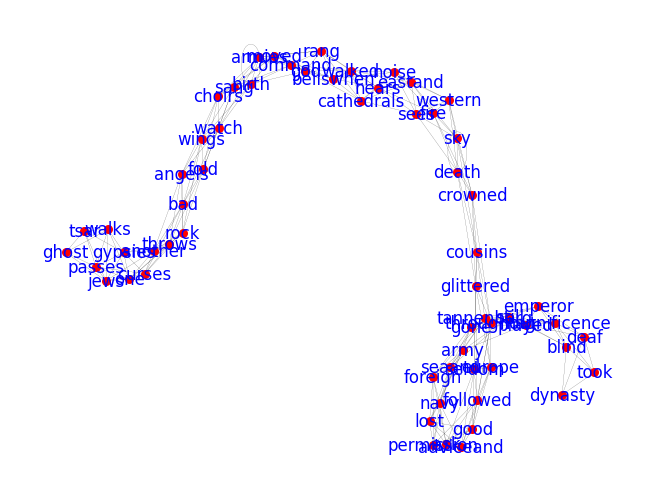

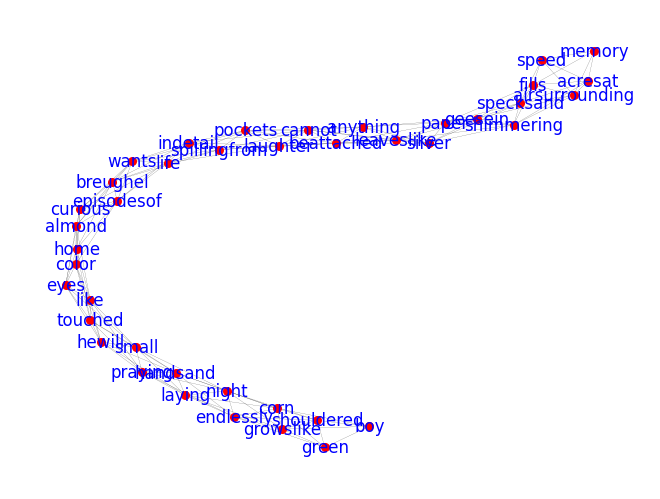

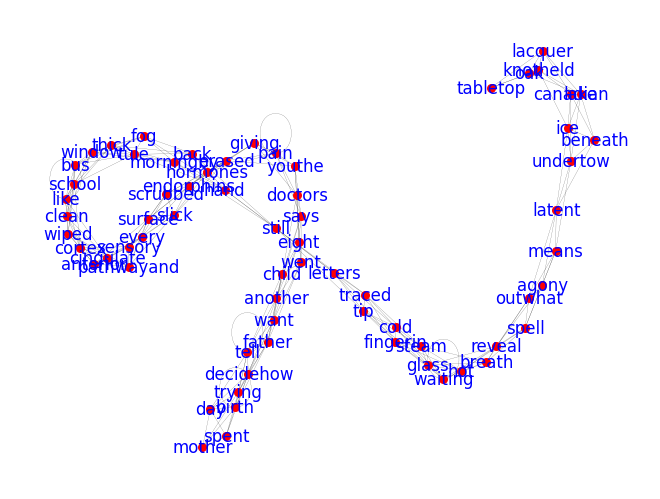

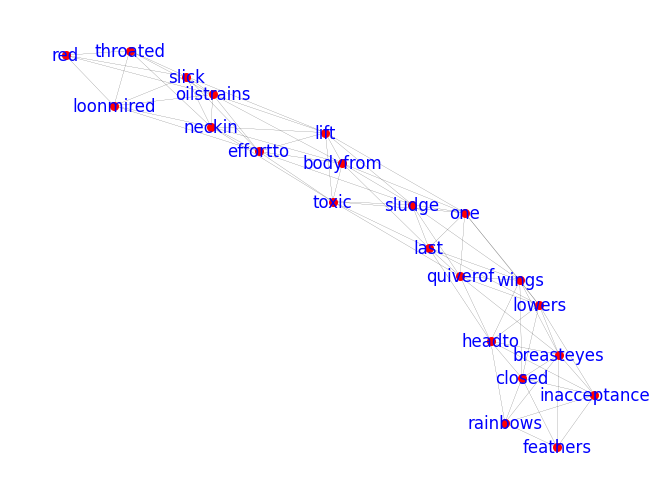

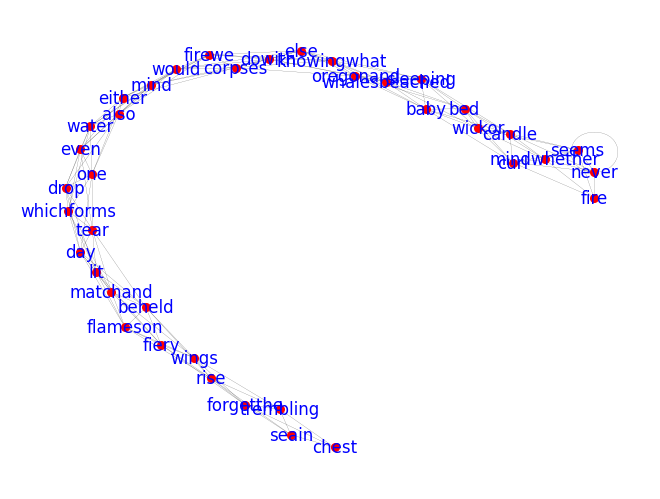

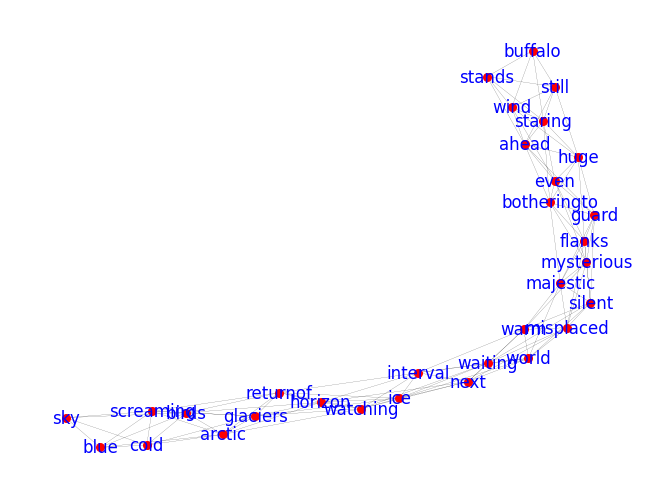

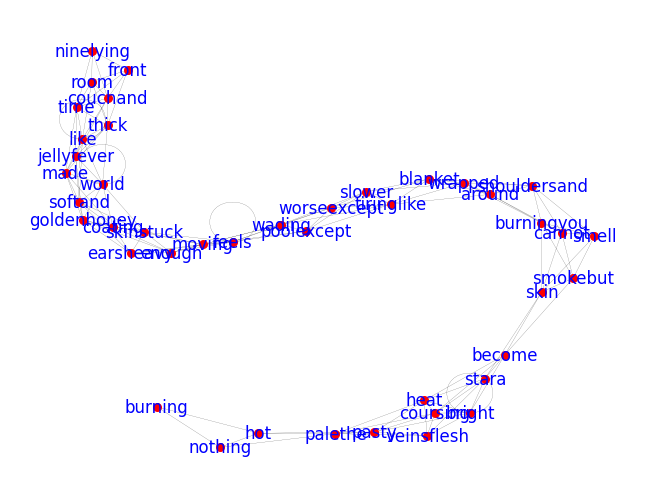

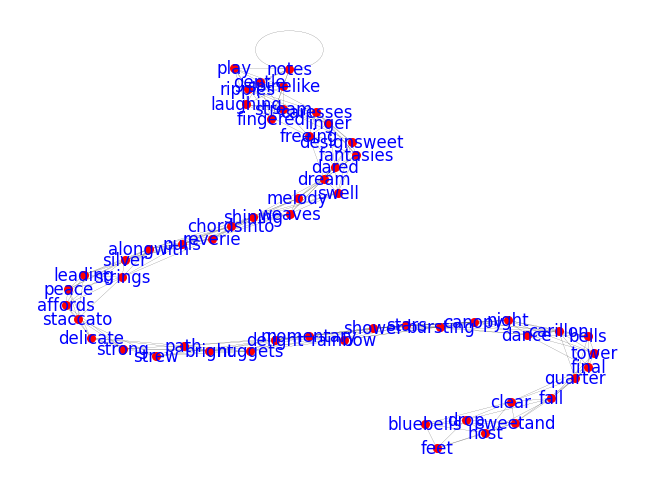

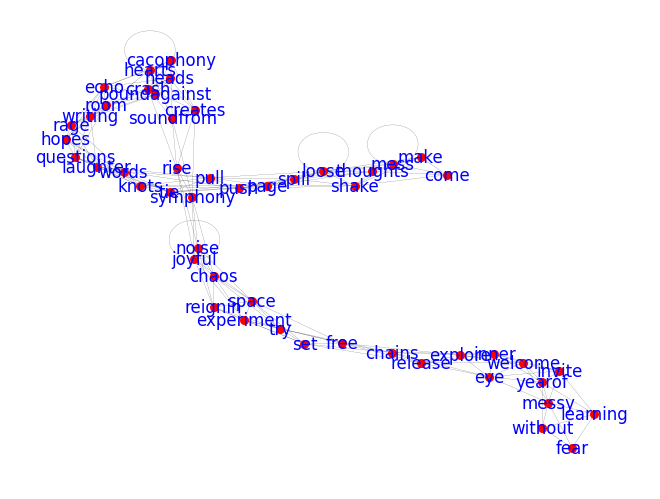

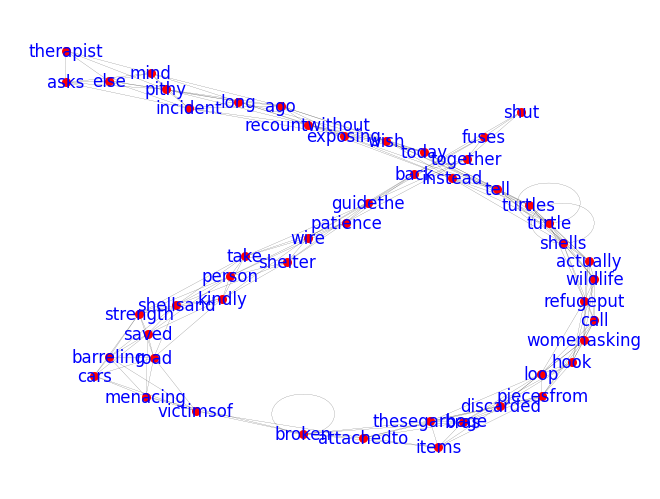

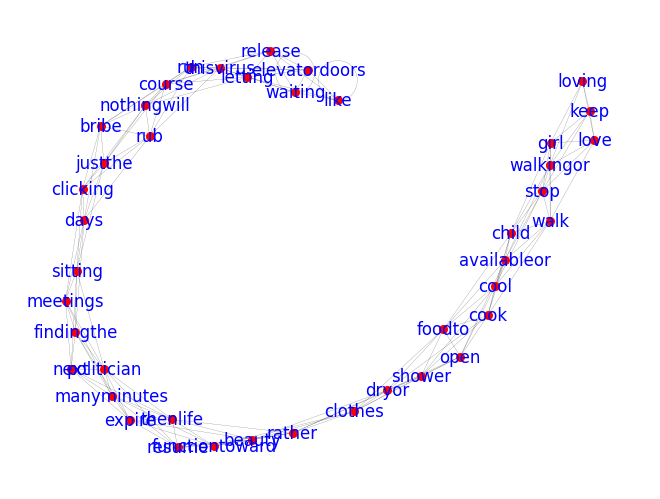

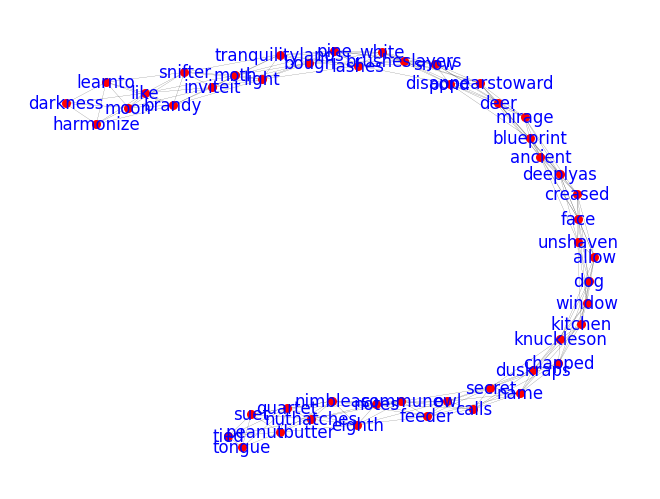

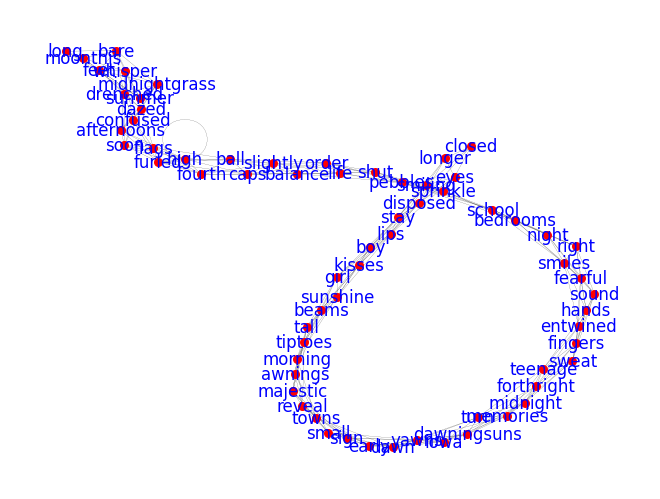

In [ ]:
for poem in poems:
    plot_binary_graph(poem)

**Use transitive closure to create larger graphs for each poem.**

In [ ]:
# Function to create a less dense binary graph for a poem
def create_binary_graph(poem_text, distance=5):
    words = [word for word in poem_text.lower().split() if word not in stop_words]
    G = nx.Graph()
    G.add_nodes_from(words)
    # Only add edges for words within a certain distance of each other
    for word1, word2 in combinations(words, 2):
        if abs(words.index(word1) - words.index(word2)) < distance:
            G.add_edge(word1, word2)
    return G

# Function to plot a graph
def plot_graph(graph):
    pos = nx.spring_layout(graph, k=0.1, iterations=20)  # Adjust the layout
    nx.draw(graph, pos, with_labels=True, font_color='red', node_size=30, width=0.1)
    plt.show()


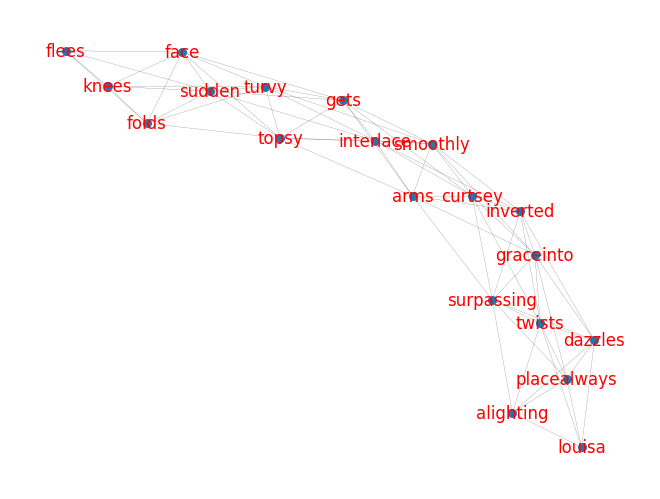

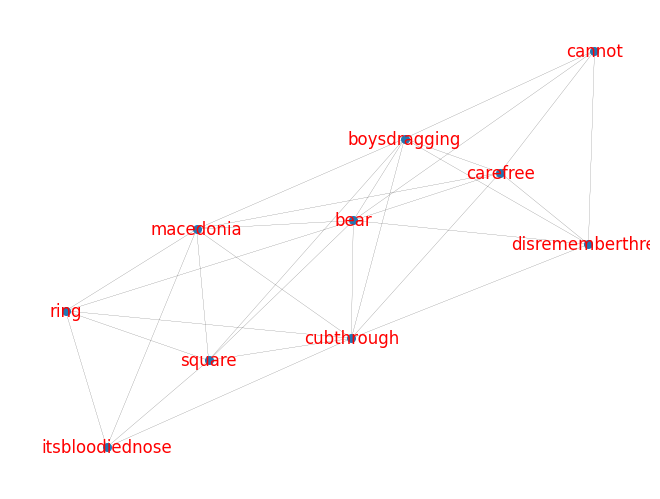

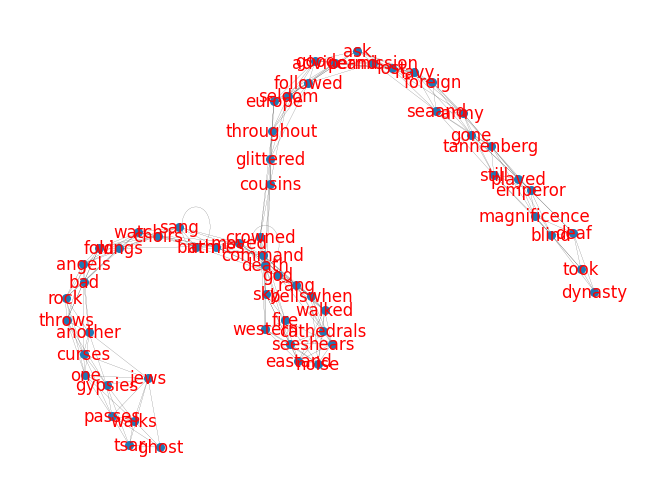

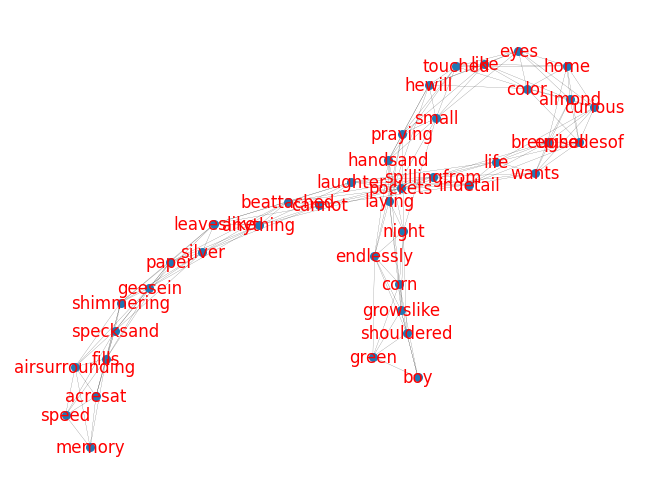

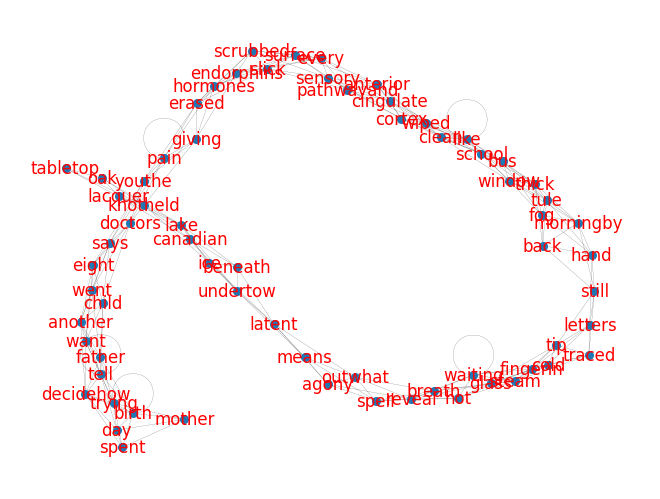

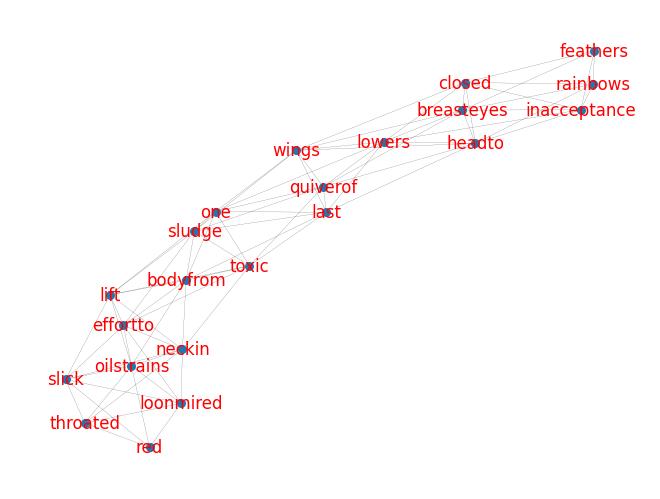

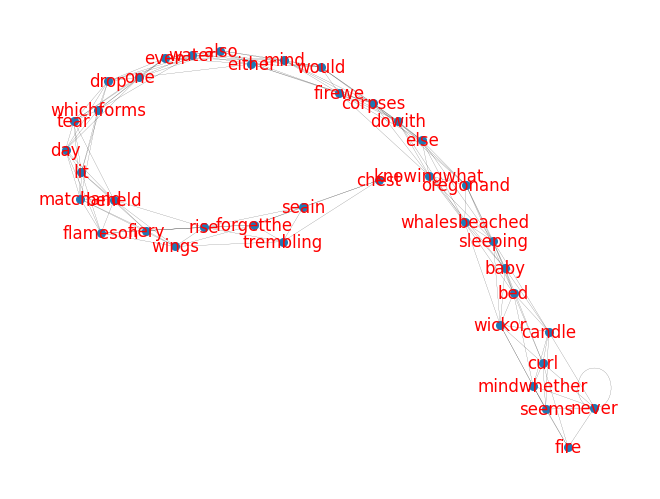

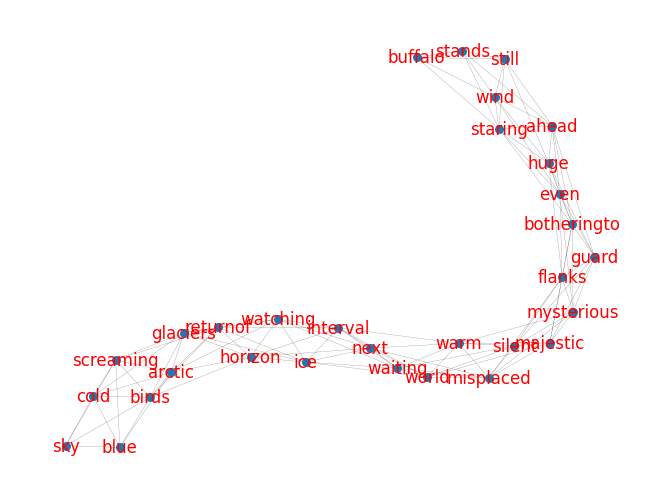

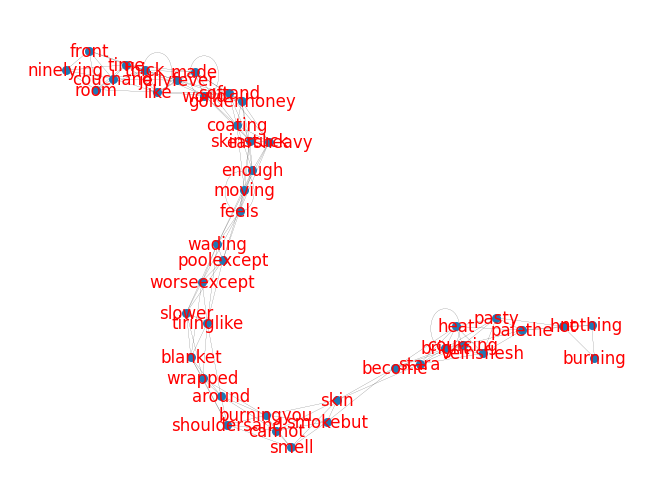

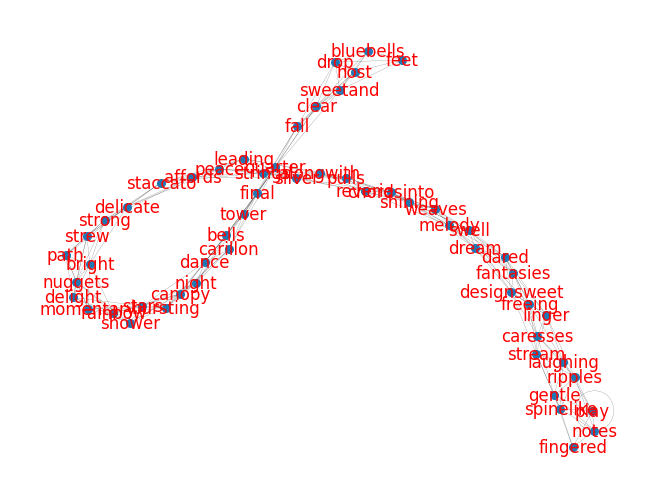

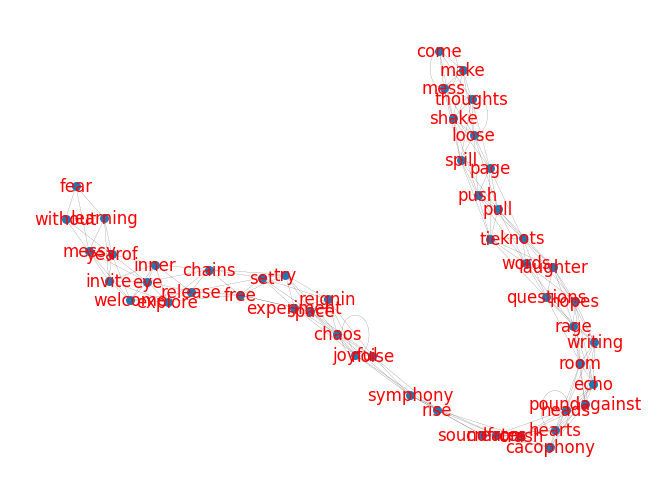

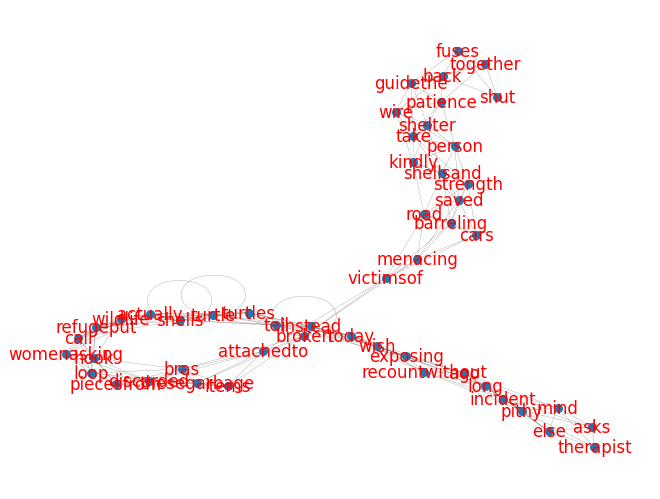

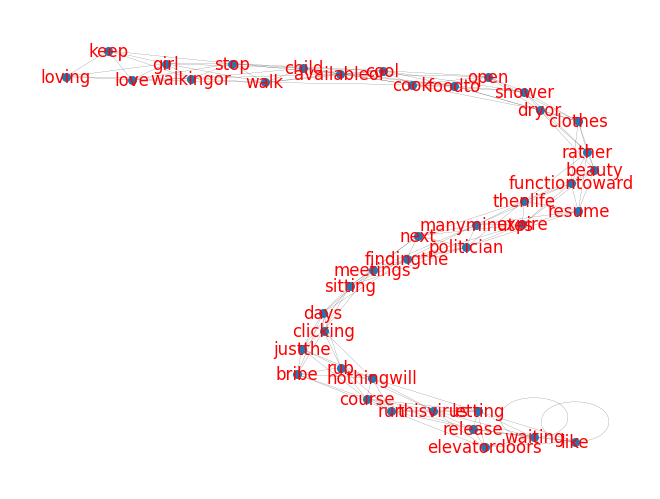

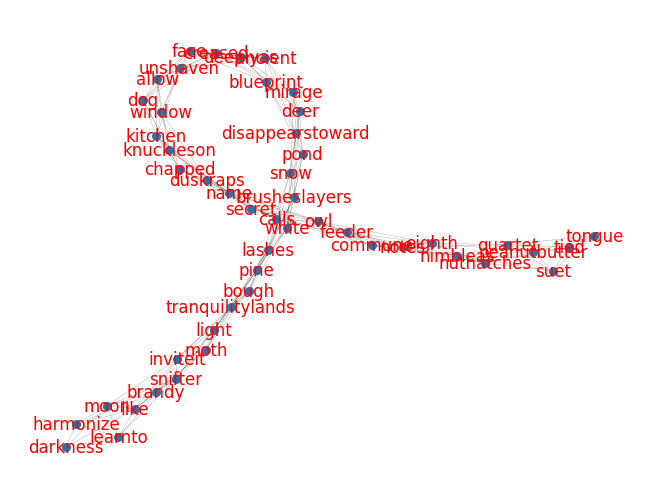

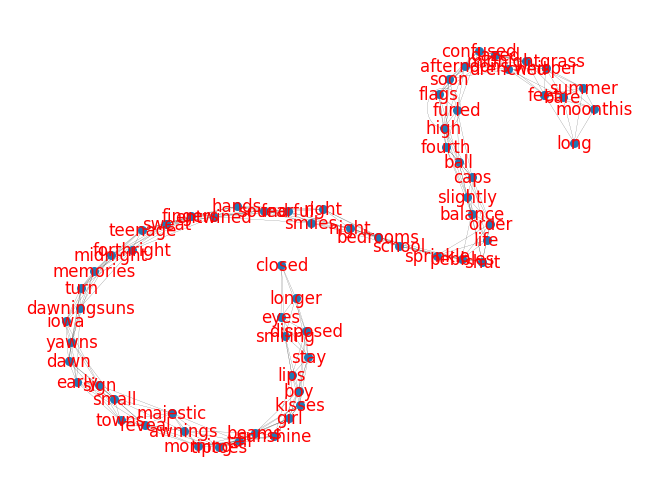

In [ ]:
for poem in poems:
    binary_graph = create_binary_graph(poem)
    plot_graph(binary_graph)

## 1.Plots: Visualizations showing the distributions of different POS

In [ ]:
for poem in poems :
  sentences = nltk.sent_tokenize(poem)
  words = [nltk.word_tokenize(sentence) for sentence in sentences]
  pos_tags = [nltk.pos_tag(word) for word in words]

print(pos_tags)

[[('it', 'PRP'), ('will', 'MD'), ('not', 'RB'), ('be', 'VB'), ('long', 'RB'), ('until', 'IN'), ('am', 'VBP'), ('with', 'IN'), ('the', 'DT'), ('moonthis', 'NN'), ('summer', 'NN'), ('bare', 'NN'), ('feet', 'NNS'), ('whisper', 'VBP'), ('on', 'IN'), ('midnightgrass', 'NN'), ('drenched', 'VBN'), ('dazed', 'VBN'), ('and', 'CC'), ('confused', 'VBN'), ('afternoons', 'NNS'), ('soon', 'RB'), ('flags', 'NNS'), ('furled', 'VBD'), ('high', 'RB'), ('on', 'IN'), ('the', 'DT'), ('fourth', 'JJ'), ('ball', 'NN'), ('caps', 'NNS'), ('slightly', 'RB'), ('off', 'IN'), ('balance', 'NN'), ('out', 'IN'), ('of', 'IN'), ('order', 'NN'), ('life', 'NN'), ('shut', 'VBD'), ('down', 'RP'), ('pebbles', 'NNS'), ('sprinkle', 'VBP'), ('high', 'JJ'), ('school', 'NN'), ('bedrooms', 'NNS'), ('at', 'IN'), ('night', 'NN'), ('will', 'MD'), ('be', 'VB'), ('right', 'RB'), ('down', 'RP'), ('she', 'PRP'), ('smiles', 'VBZ'), ('fearful', 'NNS'), ('of', 'IN'), ('sound', 'JJ'), ('hands', 'NNS'), ('entwined', 'VBD'), ('fingers', 'NNS')

In [ ]:
def count_pos(array):
  pos_counts = collections.defaultdict(int)
  pos_counts.clear()
  for i in range(len(array)):
     for token, pos_tag in array[i]:
       pos_counts[pos_tag] += 1
  return pos_counts

In [ ]:
data['count_pos'] = data['POS'].apply(count_pos)

In [ ]:
print(data['count_pos'][0])

defaultdict(<class 'int'>, {'NN': 12, 'VBG': 2, 'NNS': 2, 'VBN': 1, 'RB': 1, 'VB': 1, 'JJ': 1})


In [ ]:
def plot_pos_distribution(dict, title):
  pos = list(dict.keys())
  counts = list(dict.values())

  # Create a bar plot
  plt.bar(pos, counts)
  plt.xlabel('POS')
  plt.ylabel('Count')
  plt.title('Distribution of POS ('+title+')')
  plt.show()

In [ ]:
def pos_distribution(dict):
  pos = list(dict.keys())
  counts = list(dict.values())
  return pos,counts

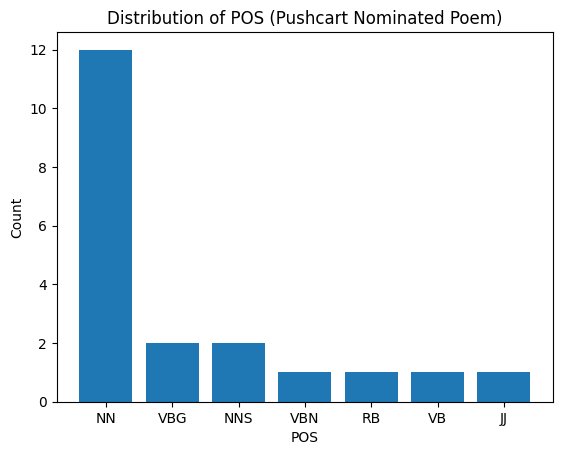

In [ ]:
plot_pos_distribution(data['count_pos'][0], 'Pushcart Nominated Poem')

In [ ]:
data.head(2)

Year              Author                   Title  \
0  2023  Christopher Hunter  LOUISA, AGE 6, AT REST   
1  2023        Susan J Koch                   SOFIA   

                                                Poem  \
0  Louisa alighting into placeAlways dazzles me.\...   
1  I cannot disrememberthree carefree boysdraggin...   

                                          clean_poem  \
0  louisa alighting into placealways dazzles me s...   
1  cannot disrememberthree carefree boysdragging ...   

                                                 POS  \
0  [[(louisa, NN)], [(alighting, VBG)], [(placeal...   
1  [[(disrememberthree, NN)], [(carefree, NN)], [...   

                                           count_pos  
0  {'NN': 12, 'VBG': 2, 'NNS': 2, 'VBN': 1, 'RB':...  
1                                          {'NN': 9}

## 2.Compare the dist of POS in each poem

In [ ]:
data['count_pos']

0     {'NN': 12, 'VBG': 2, 'NNS': 2, 'VBN': 1, 'RB':...
1                                             {'NN': 9}
2     {'NN': 41, 'CD': 1, 'DT': 1, 'JJ': 5, 'VBG': 1...
3     {'NN': 28, 'JJ': 3, 'VBN': 3, 'RB': 1, 'VBG': ...
4     {'NN': 56, 'VBG': 4, 'DT': 2, 'VBD': 3, 'CD': ...
5     {'JJ': 2, 'VBN': 2, 'NN': 12, 'NNS': 2, 'CD': ...
6     {'NN': 25, 'RB': 5, 'VBZ': 1, 'VBG': 3, 'VBN':...
7      {'NN': 18, 'RB': 3, 'VBG': 4, 'JJ': 5, 'VBN': 1}
8     {'VBG': 5, 'NN': 35, 'IN': 4, 'VBN': 1, 'RB': ...
9     {'VBN': 2, 'NN': 48, 'VBG': 4, 'NNS': 1, 'JJ': 3}
10    {'VB': 2, 'NN': 45, 'JJ': 3, 'VBG': 2, 'NNS': ...
11    {'NN': 38, 'NNS': 1, 'RB': 8, 'VBG': 3, 'VBD':...
12    {'IN': 2, 'VBG': 6, 'NNS': 3, 'NN': 28, 'VB': ...
13    {'NN': 39, 'VBN': 2, 'NNS': 4, 'VB': 1, 'RB': ...
14    {'RB': 4, 'NN': 48, 'VBN': 6, 'JJ': 6, 'NNS': ...
Name: count_pos, dtype: object

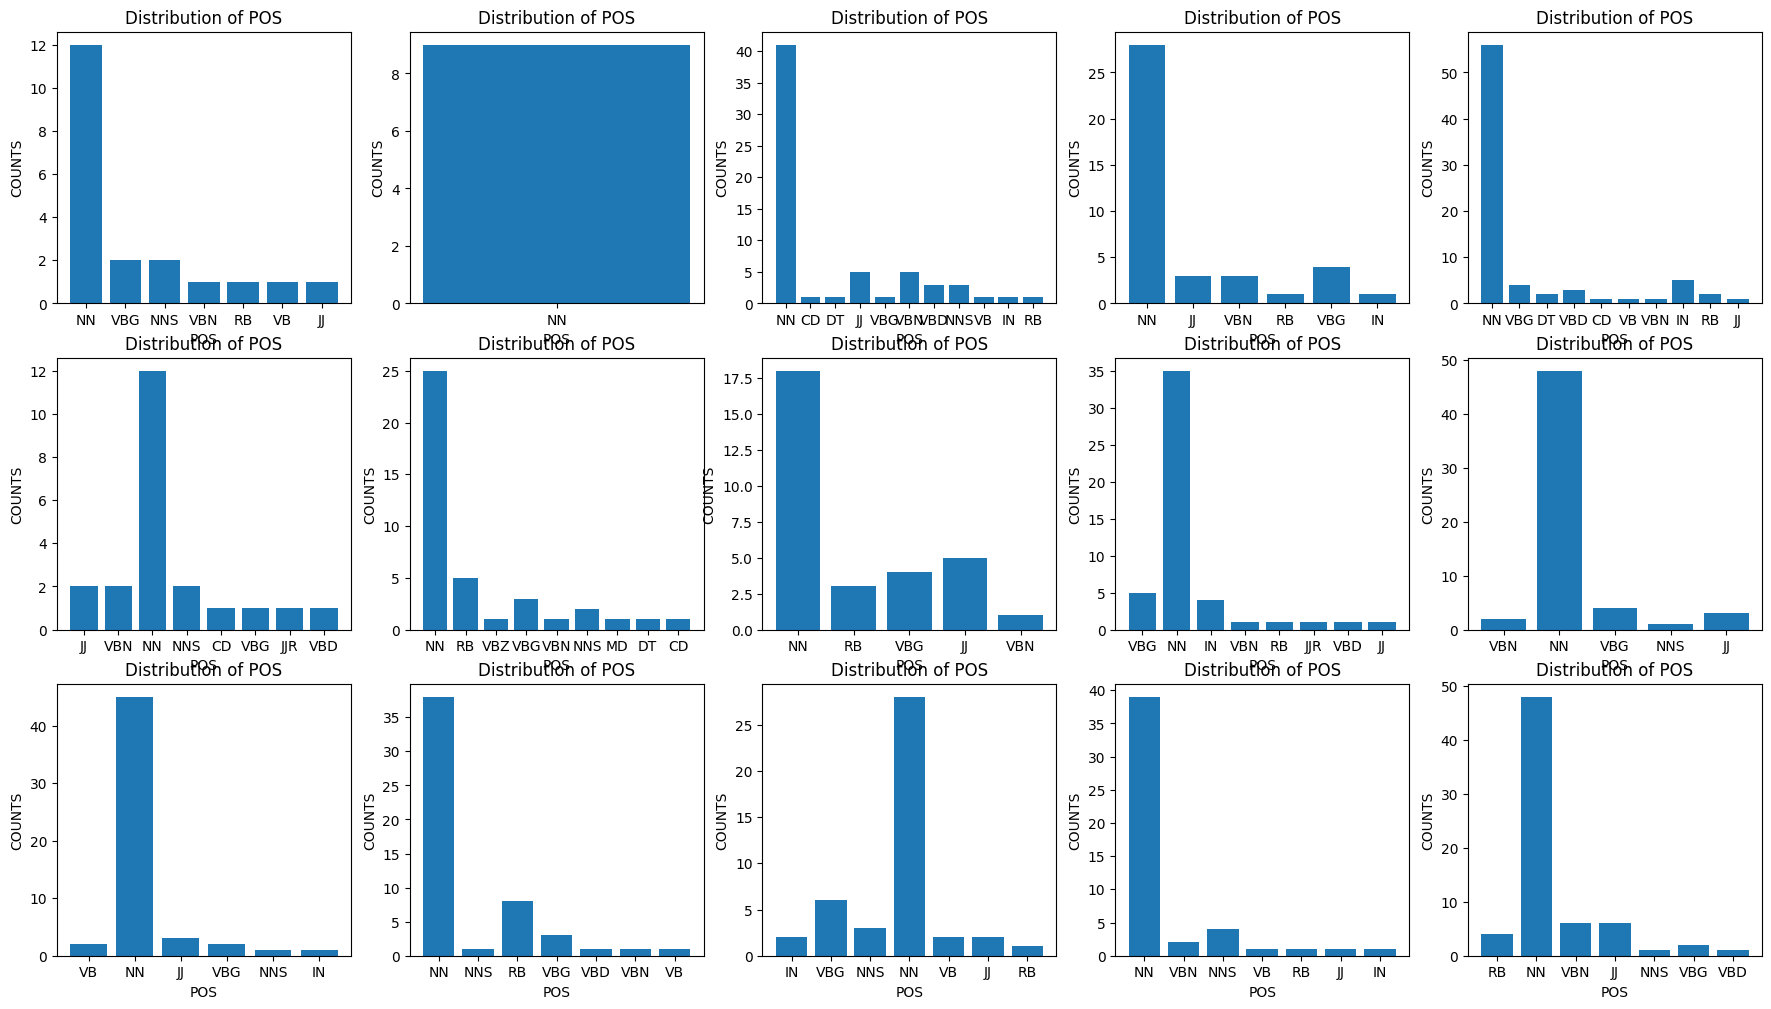

In [ ]:
# Define the number of rows and columns for the plot grid
rows = 3
cols = 5

# Create the plot grid
fig, axs = plt.subplots(rows, cols, figsize=(22,12))

# Flatten the plot grid to access each subplot
axs = axs.flatten()

# Loop through the dataframe rows and plot the data points on each subplot
for i, row in data.iterrows():
    x = pos_distribution(row['count_pos'])
    axs[i].bar(x[0], x[1])

for i in range(len(axs)):
    axs[i].set_title(f"Distribution of POS")
    axs[i].set_xlabel("POS")
    axs[i].set_ylabel("COUNTS")

plt.show()

In [ ]:
def buildPoemArray(data):
    poet = {}
    poems = list()
    for i in data:
        idx = "poem"+str(i) ##poem1
        poet[idx+"_title"] = data[i]["Title"] #poem1_title = tien
        poet[idx] = data[i]["clean_poem"] # poem
        poems.append(idx)
    poet['poems_array'] = poems
    return poet

In [ ]:
def extractAllPOS(poet):
    global_vrb = set()
    global_nns = set()
    global_adj = set()
    for key in poet['poems_array']:
        text = poet[key]
        word_list = word_tokenize(text)
        pos_value = nltk.pos_tag(word_list)
        poet["pos_"+key] = pos_value

        vrb = set([word for (word, pos) in pos_value if (pos.startswith('VB'))])
        nns = set([word for (word, pos) in pos_value if (pos.startswith('NN'))])
        adj = set([word for (word, pos) in pos_value if (pos.startswith('JJ'))])

        poet["verbs_"+key] = list(vrb)
        poet["nouns_"+key] = list(nns)
        poet["adjectives_"+key] = list(adj)

        global_vrb = set.union(global_vrb, vrb)
        global_nns = set.union(global_nns, nns)
        global_adj = set.union(global_adj, adj)

    poet["all_verbs"] = list(global_vrb)
    poet["all_nouns"] = list(global_nns)
    poet["all_adjectives"] = list(global_adj)

In [ ]:
def getPOS(file_name, df):
    pos = ""
    if os.path.exists(file_name):
        with open(file_name, 'r') as file:
            pos = json.load(file)
    else:
        pos = buildPoemArray(json.loads(df.to_json(orient="index")))
        extractAllPOS(pos)
        with open(file_name, 'w') as file:
            json.dump(pos, file)
    return pos

In [ ]:
file_name = store_loc + "Pushcart_nominated_poems.json"
pc_pos = getPOS(file_name, data)

In [ ]:
def count_pos(tokens):
    pos_counts = nltk.FreqDist(tag for word, tag in nltk.pos_tag(tokens))
    return pos_counts

## 3.Superimpose them on each other in terms of ratios of POS

In [ ]:

def process_and_plot_pos(poems, title):
    pos_data = []
    for poem in poems:
        tokens = nltk.word_tokenize(poem.lower())
        pos_counts = count_pos(tokens)
        pos_data.append(pos_counts)

    # Combine POS counts into a DataFrame
    pos_df = pd.DataFrame(pos_data)
    pos_df.fillna(0, inplace=True)

    # Normalize the counts to get proportions
    pos_df = pos_df.div(pos_df.sum(axis=1), axis=0)

    # Plot the data using a stacked bar chart
    ax = pos_df.plot(kind='bar', stacked=True)
    ax.legend(title="POS Tags", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.title(f"POS Distribution for {title}")
    plt.xlabel("Poems")
    plt.ylabel("Proportions")
    plt.show()


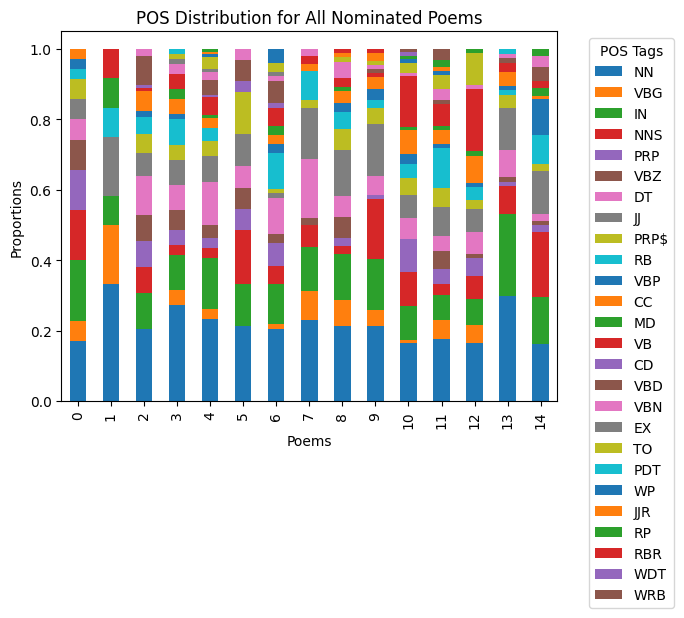

In [ ]:
process_and_plot_pos(poems, "All Nominated Poems")

## 4.Gold/reference standard
 → What did the nominated poems have in common (common denominator)

In [ ]:
for poem in poems_Nominated:
    print(poem)
    print("------------\n")

Louisa alighting into placeAlways dazzles me.
She twists with surpassing graceInto an inverted curtsey.Her arms smoothly interlace,As she gets all topsy-turvy.Until, in sudden about-face,
She folds her knees,And flees.
------------

I cannot disrememberthree carefree boysdragging a bear cubthrough Macedonia Square -a ring through itsbloodiednose.
------------

The ghost of the Tsar walks.He passes some Jews and Gypsies.One curses him; another throws a rock.Bad angels fold their wings and watch.
Choirs sang at his birth,Armies moved at his command.God rang the bellsWhen he walked into cathedrals.But now he hears the noise from out the eastAnd sees the fire in the western sky.
Death crowned him at his birth,His cousins glittered throughout Europe.He seldom followed good adviceAnd did not ask permission.He lost a navy in a foreign seaAnd an army gone at Tannenberg,But still he played the emperor.Magnificence is blind and deaf,And death took all his dynasty.
------------

A boy green shoul

In [ ]:
import nltk
from collections import Counter

# Assuming you have already loaded the poems into the 'poems_Nominated' list

pos_counts_n = []
for poem in poems_Nominated:
    words_n = nltk.word_tokenize(poem)
    pos_tags_n = nltk.pos_tag(words_n)  # Fix variable name 'words_n'
    pos_counts_n.append(Counter([tag for word, tag in pos_tags_n]))  # Fix variable name 'pos_tags_n'

# Combine POS counts for all poems
total_counts_n = Counter()
for counts in pos_counts_n:
    total_counts_n += counts

# Calculate total number of words across all poems
total_words_n = sum(total_counts_n.values())

# Calculate proportion of each POS tag
pos_proportions_n = {tag: count / total_words_n for tag, count in total_counts_n.items()}

# Identify most common POS tags
most_common_n = total_counts_n.most_common(5)  # Top 5 most common tags

# Print results
print("Most common POS tags for Nominated Poems:")
for tag, count in most_common_n:
    print(f"{tag}: {count} ({pos_proportions_n[tag]:.2%})")


Most common POS tags for Nominated Poems:
NN: 245 (19.13%)
IN: 135 (10.54%)
DT: 122 (9.52%)
JJ: 88 (6.87%)
NNS: 75 (5.85%)


## 5.Plot stats

In [ ]:
print(most_common_n)

[('NN', 245), ('IN', 135), ('DT', 122), ('JJ', 88), ('NNS', 75)]


In [ ]:
print(pos_proportions_n)

{'NNP': 0.02185792349726776, 'VBG': 0.02654176424668228, 'IN': 0.1053864168618267, 'NNS': 0.0585480093676815, 'PRP': 0.04371584699453552, '.': 0.03981264637002342, 'VBZ': 0.03434816549570648, 'NN': 0.1912568306010929, 'DT': 0.09523809523809523, 'JJ': 0.06869633099141297, 'RB': 0.04215456674473068, ',': 0.047619047619047616, 'VBD': 0.02419984387197502, 'CC': 0.03278688524590164, 'MD': 0.0078064012490242, 'VB': 0.03981264637002342, ':': 0.00858704137392662, 'VBP': 0.01873536299765808, 'PRP$': 0.03590944574551132, 'VBN': 0.01405152224824356, 'TO': 0.01795472287275566, 'PDT': 0.00156128024980484, 'WP': 0.00468384074941452, 'CD': 0.00234192037470726, 'JJR': 0.00312256049960968, 'EX': 0.00156128024980484, 'RP': 0.0039032006245121, 'RBR': 0.00078064012490242, 'WDT': 0.00078064012490242, 'WRB': 0.00312256049960968, '``': 0.00078064012490242, "''": 0.00078064012490242, 'NNPS': 0.00078064012490242, 'POS': 0.00078064012490242}


In [ ]:
sorted_pos_percentages_n = {k: v for k, v in sorted(pos_proportions_n.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
for tag, count in most_common_n:
  sorted_pos_percentages_n = {k: v for k, v in sorted(pos_proportions_n.items(), key=lambda item: item[1], reverse=True)}

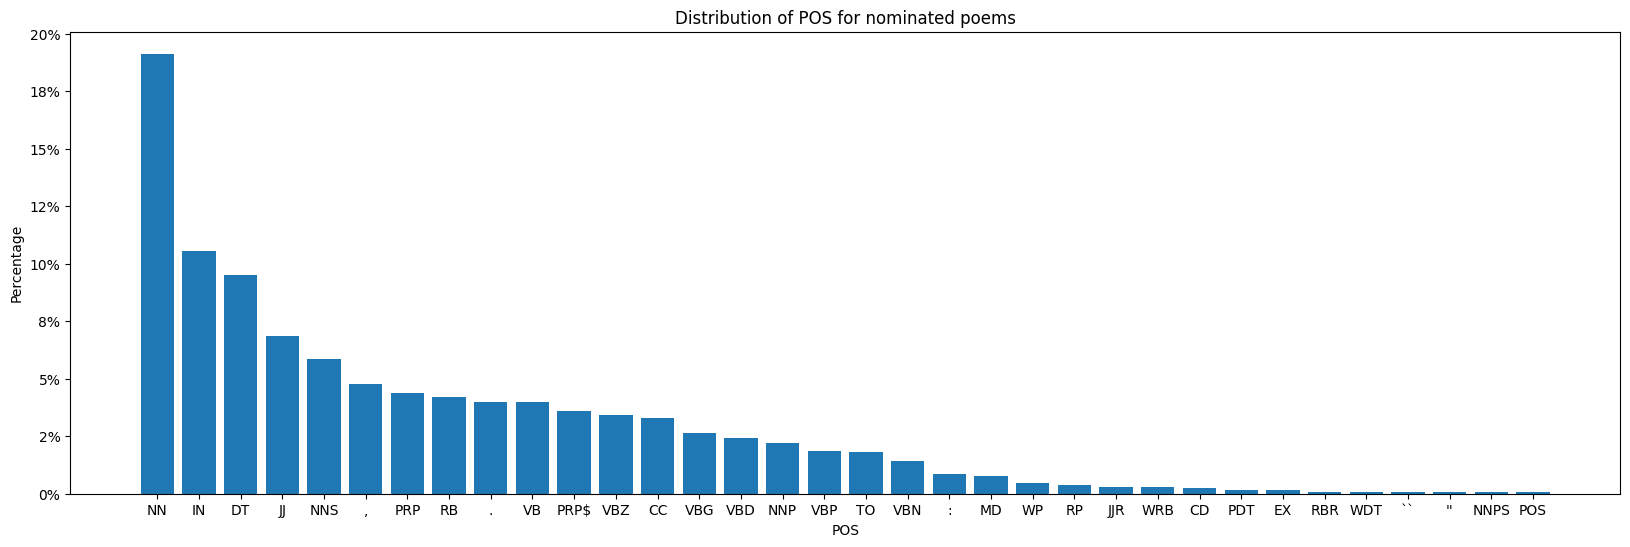

In [ ]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(20, 6))  # Adjust the width and height as needed

def to_percentage(y, _):
    return f'{y * 100:.0f}%'

formatter = FuncFormatter(to_percentage)

ax.bar(sorted_pos_percentages_n.keys(), sorted_pos_percentages_n.values())
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('POS')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of POS for nominated poems')

plt.show()

In [ ]:
most_common_pos = {}
for tag, count in most_common_n:
  most_common_pos[tag] = pos_proportions_n[tag]

In [ ]:
print(most_common_pos)

{'NN': 0.1912568306010929, 'IN': 0.1053864168618267, 'DT': 0.09523809523809523, 'JJ': 0.06869633099141297, 'NNS': 0.0585480093676815}


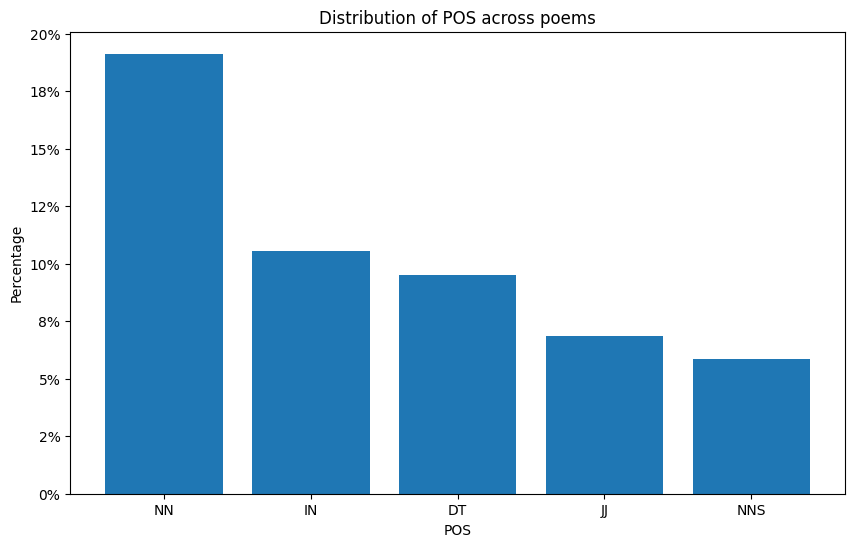

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.bar(most_common_pos.keys(), most_common_pos.values())

# Apply the custom formatter to the y-axis
ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('POS')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of POS across poems')

plt.show()

# B. Topic

Analyze topics for the prize winning poems of that year

In [ ]:
data.head()

Year              Author                                     Title  \
0  2023  Christopher Hunter                    LOUISA, AGE 6, AT REST   
1  2023        Susan J Koch                                     SOFIA   
2  2023       John Mitchell                               NICHOLAS II   
3  2023        Alise Palmer                                   BELTANE   
4  2023         Rose Postma  ON TELLING MY MOTHER I AM PREGNANT AGAIN   

                                                Poem  \
0  Louisa alighting into placeAlways dazzles me.\...   
1  I cannot disrememberthree carefree boysdraggin...   
2  The ghost of the Tsar walks.He passes some Jew...   
3  A boy green shouldered, growslike corn endless...   
4  My mother, who spent the day after my birth tr...   

                                          clean_poem  \
0  louisa alighting into placealways dazzles me s...   
1  cannot disrememberthree carefree boysdragging ...   
2  the ghost of the tsar walks he passes some jew...   
3  boy green shouldered growslike corn endlessly ...   
4  my mother who spent the day after my birth try...   

                                                 POS  \
0  [[(louisa, NN)], [(alighting, VBG)], [(placeal...   
1  [[(disrememberthree, NN)], [(carefree, NN)], [...   
2  [[(ghost, NN)], [(tsar, NN)], [(walk, NN)], [(...   
3  [[(boy, NN)], [(green, JJ)], [(shouldered, VBN...   
4  [[(mother, NN)], [(spent, NN)], [(day, NN)], [...   

                                           count_pos  
0  {'NN': 12, 'VBG': 2, 'NNS': 2, 'VBN': 1, 'RB':...  
1                                          {'NN': 9}  
2  {'NN': 41, 'CD': 1, 'DT': 1, 'JJ': 5, 'VBG': 1...  
3  {'NN': 28, 'JJ': 3, 'VBN': 3, 'RB': 1, 'VBG': ...  
4  {'NN': 56, 'VBG': 4, 'DT': 2, 'VBD': 3, 'CD': ...

In [ ]:
# Preprocess the poems
preprocessed_corpus = []
for poem in poems:
    # Tokenize the poem
    tokens = nltk.word_tokenize(poem)

    # Remove stop words and lemmatize words
    processed_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]

    # Add processed tokens to preprocessed_corpus
    preprocessed_corpus.append(processed_tokens)

# Create dictionary and bag-of-words representations of poems
dictionary = corpora.Dictionary(preprocessed_corpus)
bow_corpus = [dictionary.doc2bow(poem) for poem in preprocessed_corpus]

# Create the document-term matrix
dtm = corpora.MmCorpus.serialize('dtm_corpus.mm', bow_corpus)

In [ ]:
 #Preprocess the poems
dictionary = corpora.Dictionary(preprocessed_corpus)
corpus = [dictionary.doc2bow(poem) for poem in preprocessed_corpus]

In [ ]:
from gensim.models import LdaModel

# Train an LDA model on the document-term matrix
lda_model = LdaModel(dtm, num_topics=5, id2word=dictionary, passes=10)

In [ ]:
from gensim.models import CoherenceModel

# Compute the coherence score of the model
coherence_score = CoherenceModel(model=lda_model, texts=preprocessed_corpus, dictionary=dictionary, coherence='c_v').get_coherence()

print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.7386285552050955


In [ ]:
for topic_num, topic_words in lda_model.show_topics(num_topics=-1, num_words=10):
    print(f"Topic {topic_num+1}: {topic_words}")

Topic 1: 0.002*"crash" + 0.002*"ninelying" + 0.002*"silver" + 0.002*"tiptoe" + 0.002*"name" + 0.002*"knowingwhat" + 0.002*"open" + 0.002*"knotheld" + 0.002*"pithy" + 0.002*"next"
Topic 2: 0.002*"stay" + 0.002*"trying" + 0.002*"speed" + 0.002*"lake" + 0.002*"justthe" + 0.002*"coursing" + 0.002*"back" + 0.002*"final" + 0.002*"eastand" + 0.002*"sitting"
Topic 3: 0.002*"play" + 0.002*"command" + 0.002*"get" + 0.002*"smile" + 0.002*"silent" + 0.002*"fiery" + 0.002*"shouldered" + 0.002*"come" + 0.002*"eight" + 0.002*"shimmering"
Topic 4: 0.002*"smell" + 0.002*"took" + 0.002*"mess" + 0.002*"carefree" + 0.002*"macedonia" + 0.002*"bluebell" + 0.002*"clicking" + 0.002*"slick" + 0.002*"brandy" + 0.002*"nothing"
Topic 5: 0.002*"functiontoward" + 0.002*"tannenberg" + 0.002*"caress" + 0.002*"findingthe" + 0.002*"smile" + 0.002*"fear" + 0.002*"delight" + 0.002*"chordsinto" + 0.002*"death" + 0.002*"cool"


In [ ]:
preprocessed_corpus = []
    # Tokenize the poem
tokens = nltk.word_tokenize(data['clean_poem'][0])

    # Remove stop words and lemmatize words
processed_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]

    # Add processed tokens to preprocessed_corpus
preprocessed_corpus.append(processed_tokens)

# Create dictionary and bag-of-words representations of poems
dictionary = corpora.Dictionary(preprocessed_corpus)
bow_corpus = [dictionary.doc2bow(poem) for poem in preprocessed_corpus]

# Create the document-term matrix
dtm_p1 = corpora.MmCorpus.serialize('dtm_corpus.mm', bow_corpus)

lda_model_p1 = LdaModel(dtm_p1, num_topics=5, id2word=dictionary, passes=10)

coherence_score_p1 = CoherenceModel(model=lda_model_p1, texts=preprocessed_corpus, dictionary=dictionary, coherence='c_v').get_coherence()

print(f"Coherence Score: {coherence_score}")

for topic_num, topic_words in lda_model_p1.show_topics(num_topics=-1, num_words=10):
    print(f"Topic {topic_num+1}: {topic_words}")

Coherence Score: 0.7386285552050955
Topic 1: 0.060*"twist" + 0.058*"flees" + 0.055*"knee" + 0.054*"get" + 0.053*"turvy" + 0.053*"arm" + 0.052*"surpassing" + 0.051*"louisa" + 0.051*"face" + 0.050*"interlace"
Topic 2: 0.058*"smoothly" + 0.056*"fold" + 0.054*"dazzle" + 0.054*"graceinto" + 0.053*"alighting" + 0.052*"arm" + 0.052*"interlace" + 0.050*"twist" + 0.050*"sudden" + 0.050*"topsy"
Topic 3: 0.057*"dazzle" + 0.055*"topsy" + 0.054*"placealways" + 0.054*"interlace" + 0.053*"louisa" + 0.052*"surpassing" + 0.051*"get" + 0.051*"flees" + 0.051*"knee" + 0.050*"curtsey"
Topic 4: 0.058*"surpassing" + 0.057*"turvy" + 0.057*"smoothly" + 0.057*"placealways" + 0.056*"interlace" + 0.054*"arm" + 0.053*"dazzle" + 0.053*"face" + 0.051*"inverted" + 0.050*"knee"
Topic 5: 0.058*"placealways" + 0.055*"turvy" + 0.055*"topsy" + 0.053*"arm" + 0.052*"face" + 0.052*"get" + 0.052*"smoothly" + 0.051*"twist" + 0.051*"sudden" + 0.051*"inverted"


In [ ]:
def topic_model(poem):
  vectorizer = CountVectorizer()
  doc_term_matrix = vectorizer.fit_transform(poem)
  lda_model = LatentDirichletAllocation(n_components=5, random_state=0)
  lda_model.fit(doc_term_matrix)
  for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {' '.join([vectorizer.get_feature_names()[index] for index in topic.argsort()[:-11:-1]])}")

In [ ]:
def docterm_matrix(poem):
  poem = poem.translate(str.maketrans('', '', string.punctuation))
  print(poem)
  poem = poem.lower()
  words = word_tokenize(poem)
  stop_words = set(stopwords.words('english'))
  words = [word for word in words if word not in stop_words]
  vectorizer = CountVectorizer()
  doc_term_matrix = vectorizer.fit_transform([' '.join(words)])
  return doc_term_matrix.toarray()

In [ ]:
data['doc_term_matrix'] = 4

# C. Sentiment Analysis

## 1.Analyze sentiments for the prize winning poems of that year

In [ ]:
poem1 = data['clean_poem'][0]

In [ ]:
data['sentiment'] = {}

In [ ]:
def check_sentiment(poem):
  sid = SentimentIntensityAnalyzer()
  scores = sid.polarity_scores(poem)
  return scores

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
for i in range(len(data)):
  poem = data['clean_poem'][i]
  data['sentiment'][i] = check_sentiment(poem)

In [ ]:
data.head()

Year              Author                                     Title  \
0  2023  Christopher Hunter                    LOUISA, AGE 6, AT REST   
1  2023        Susan J Koch                                     SOFIA   
2  2023       John Mitchell                               NICHOLAS II   
3  2023        Alise Palmer                                   BELTANE   
4  2023         Rose Postma  ON TELLING MY MOTHER I AM PREGNANT AGAIN   

                                                Poem  \
0  Louisa alighting into placeAlways dazzles me.\...   
1  I cannot disrememberthree carefree boysdraggin...   
2  The ghost of the Tsar walks.He passes some Jew...   
3  A boy green shouldered, growslike corn endless...   
4  My mother, who spent the day after my birth tr...   

                                          clean_poem  \
0  louisa alighting into placealways dazzles me s...   
1  cannot disrememberthree carefree boysdragging ...   
2  the ghost of the tsar walks he passes some jew...   
3  boy green shouldered growslike corn endlessly ...   
4  my mother who spent the day after my birth try...   

                                                 POS  \
0  [[(louisa, NN)], [(alighting, VBG)], [(placeal...   
1  [[(disrememberthree, NN)], [(carefree, NN)], [...   
2  [[(ghost, NN)], [(tsar, NN)], [(walk, NN)], [(...   
3  [[(boy, NN)], [(green, JJ)], [(shouldered, VBN...   
4  [[(mother, NN)], [(spent, NN)], [(day, NN)], [...   

                                           count_pos  doc_term_matrix  \
0  {'NN': 12, 'VBG': 2, 'NNS': 2, 'VBN': 1, 'RB':...                4   
1                                          {'NN': 9}                4   
2  {'NN': 41, 'CD': 1, 'DT': 1, 'JJ': 5, 'VBG': 1...                4   
3  {'NN': 28, 'JJ': 3, 'VBN': 3, 'RB': 1, 'VBG': ...                4   
4  {'NN': 56, 'VBG': 4, 'DT': 2, 'VBD': 3, 'CD': ...                4   

                                           sentiment  
0  {'neg': 0.048, 'neu': 0.952, 'pos': 0.0, 'comp...  
1  {'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'comp...  
2  {'neg': 0.204, 'neu': 0.726, 'pos': 0.069, 'co...  
3  {'neg': 0.056, 'neu': 0.839, 'pos': 0.105, 'co...  
4  {'neg': 0.108, 'neu': 0.75, 'pos': 0.142, 'com...

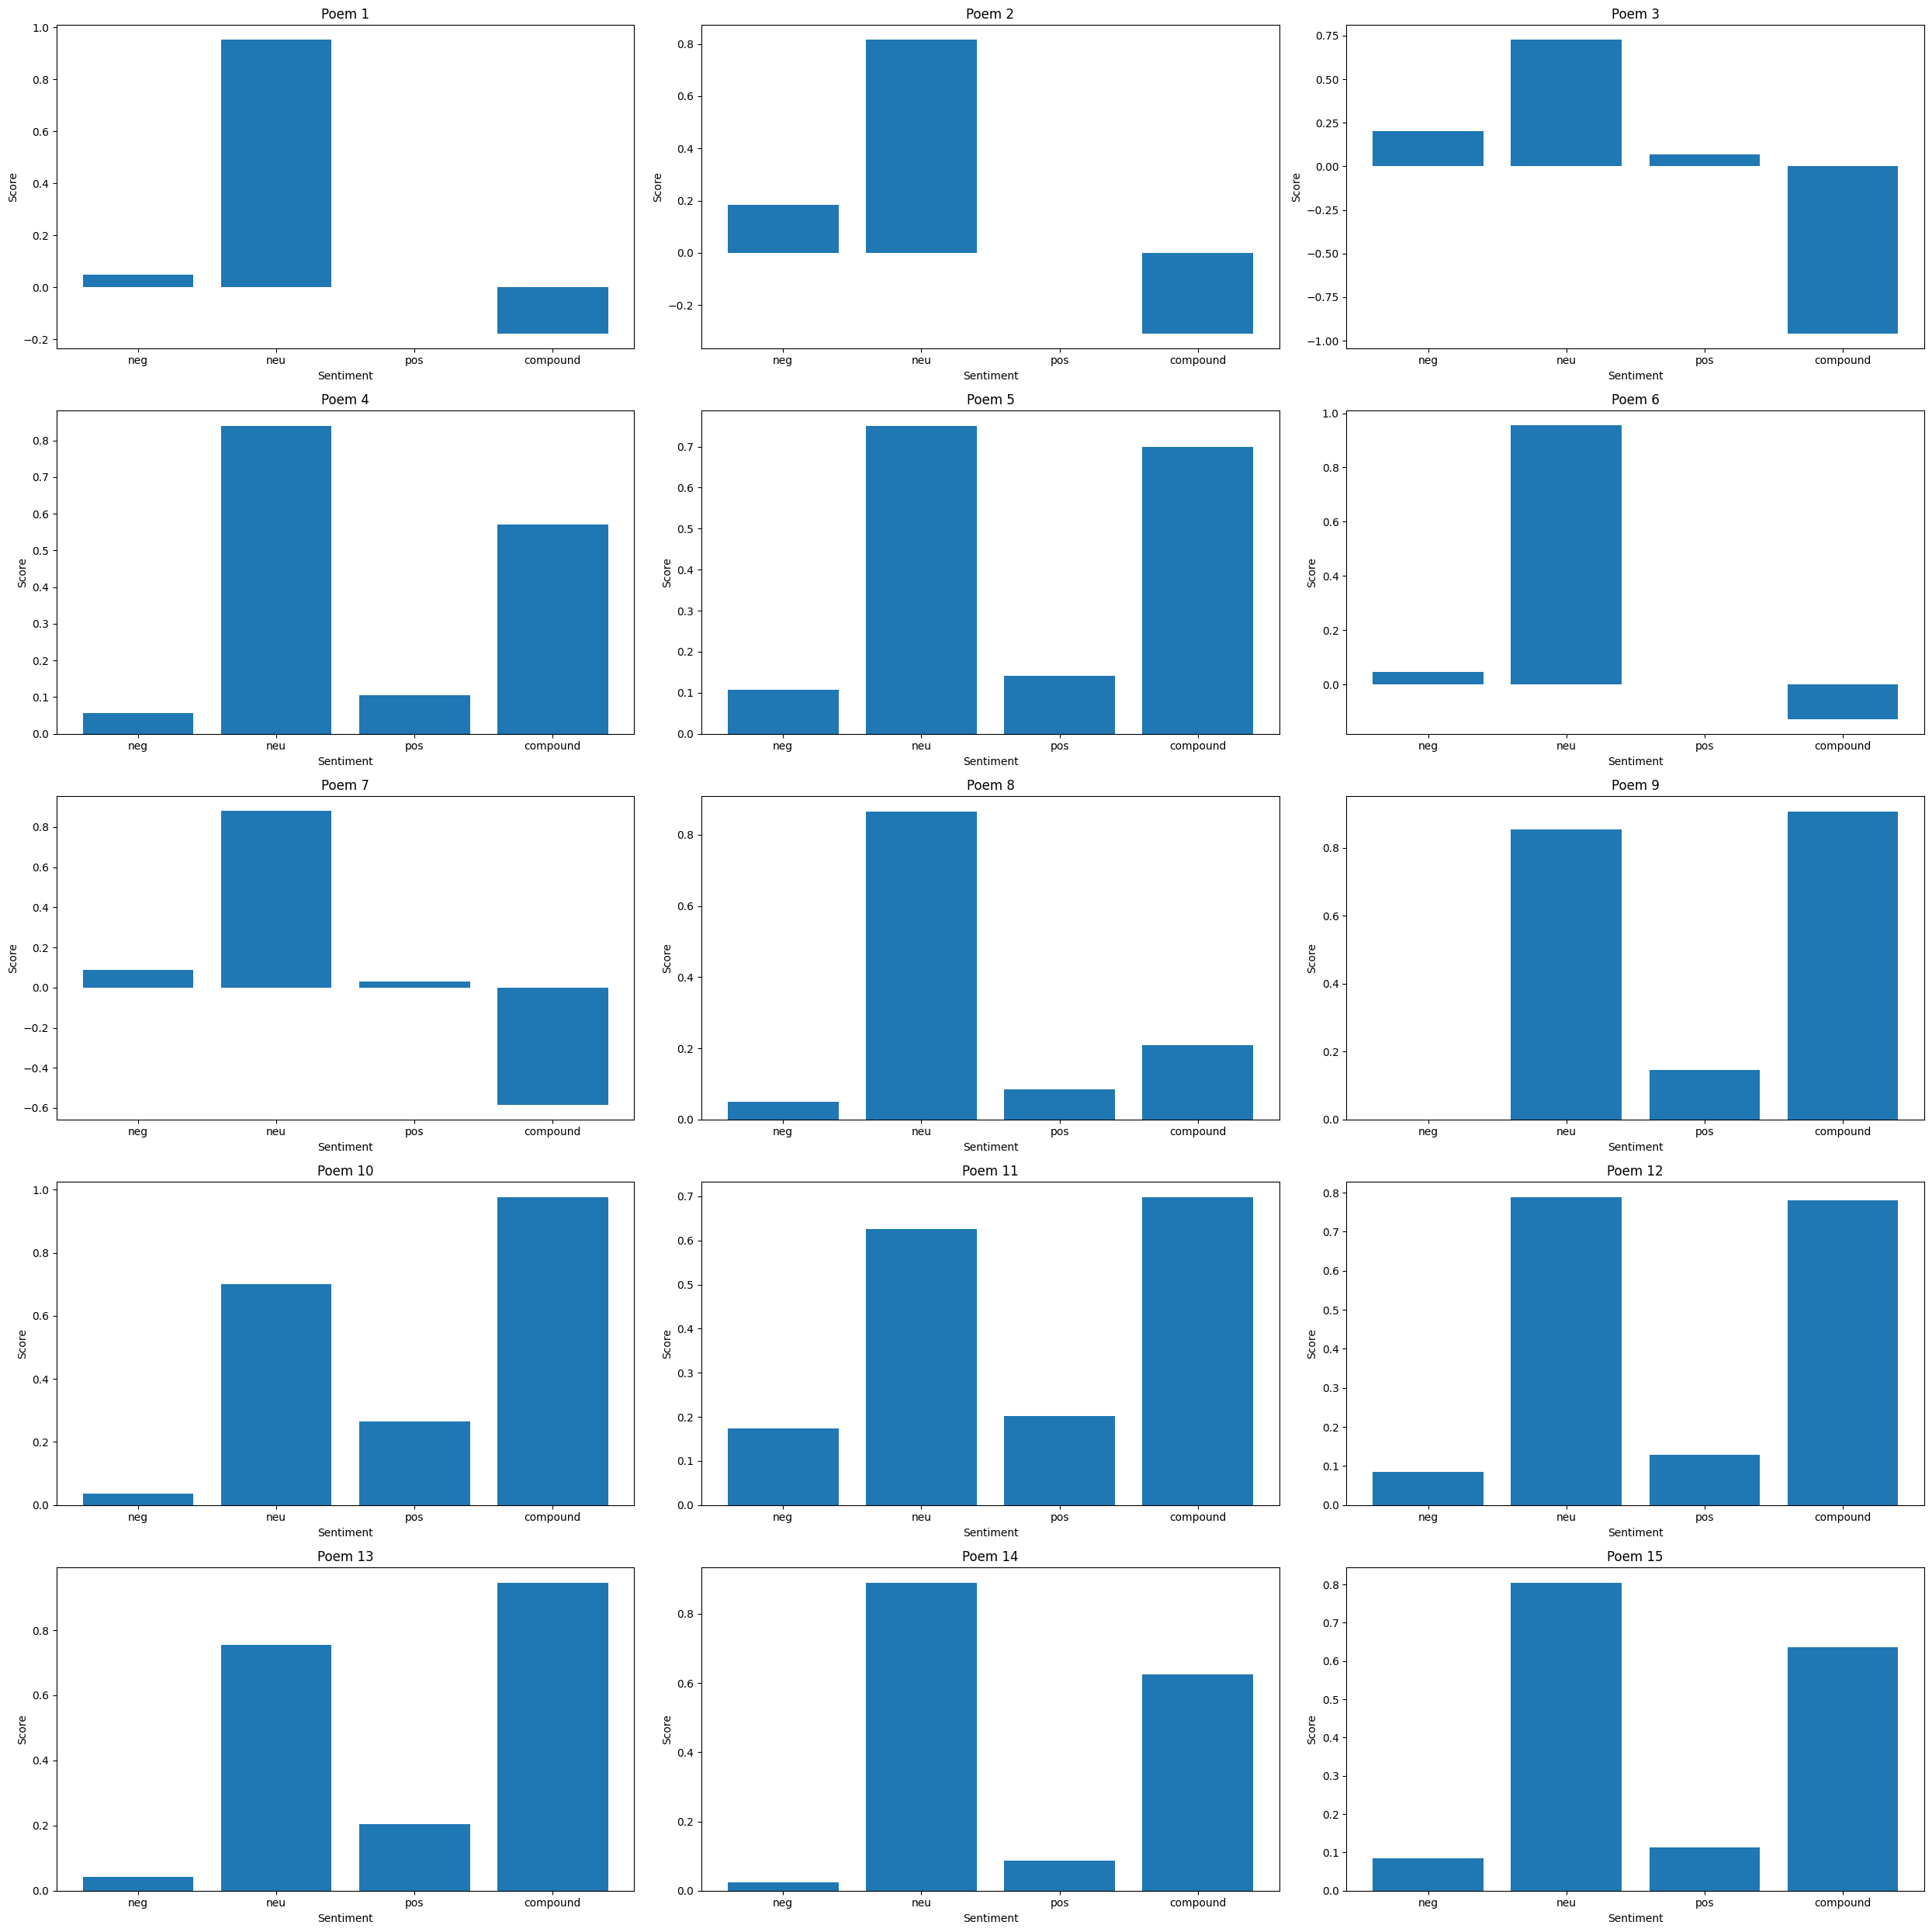

In [ ]:
import matplotlib.pyplot as plt

# Modify the plot_dist_sentiment function to accept an additional 'ax' argument
def plot_dist_sentiment(dict, ax):
    senti = list(dict.keys())
    counts = list(dict.values())

    # Create a bar plot on the specified axis
    ax.bar(senti, counts)
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Score')
    ax.set_title('Distribution of Sentiments in Pushcart Nominated Poem')

# Assuming you have 'data' with 15 poems and sentiment information
num_poems = len(data)
num_subplots_per_row = 3

# Calculate the number of rows and columns for subplots
num_rows = (num_poems - 1) // num_subplots_per_row + 1
num_cols = min(num_poems, num_subplots_per_row)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(25, 25))

for i in range(num_poems):
    row = i // num_subplots_per_row
    col = i % num_subplots_per_row

    if num_rows == 1:
        ax = axs[col]
    else:
        ax = axs[row, col]

    plot_dist_sentiment(data['sentiment'][i], ax)
    ax.set_title(f'Poem {i + 1}')

plt.tight_layout()
plt.show()


In [ ]:
data.head()

Year              Author                                     Title  \
0  2023  Christopher Hunter                    LOUISA, AGE 6, AT REST   
1  2023        Susan J Koch                                     SOFIA   
2  2023       John Mitchell                               NICHOLAS II   
3  2023        Alise Palmer                                   BELTANE   
4  2023         Rose Postma  ON TELLING MY MOTHER I AM PREGNANT AGAIN   

                                                Poem  \
0  Louisa alighting into placeAlways dazzles me.\...   
1  I cannot disrememberthree carefree boysdraggin...   
2  The ghost of the Tsar walks.He passes some Jew...   
3  A boy green shouldered, growslike corn endless...   
4  My mother, who spent the day after my birth tr...   

                                          clean_poem  \
0  louisa alighting into placealways dazzles me s...   
1  cannot disrememberthree carefree boysdragging ...   
2  the ghost of the tsar walks he passes some jew...   
3  boy green shouldered growslike corn endlessly ...   
4  my mother who spent the day after my birth try...   

                                                 POS  \
0  [[(louisa, NN)], [(alighting, VBG)], [(placeal...   
1  [[(disrememberthree, NN)], [(carefree, NN)], [...   
2  [[(ghost, NN)], [(tsar, NN)], [(walk, NN)], [(...   
3  [[(boy, NN)], [(green, JJ)], [(shouldered, VBN...   
4  [[(mother, NN)], [(spent, NN)], [(day, NN)], [...   

                                           count_pos  doc_term_matrix  \
0  {'NN': 12, 'VBG': 2, 'NNS': 2, 'VBN': 1, 'RB':...                4   
1                                          {'NN': 9}                4   
2  {'NN': 41, 'CD': 1, 'DT': 1, 'JJ': 5, 'VBG': 1...                4   
3  {'NN': 28, 'JJ': 3, 'VBN': 3, 'RB': 1, 'VBG': ...                4   
4  {'NN': 56, 'VBG': 4, 'DT': 2, 'VBD': 3, 'CD': ...                4   

                                           sentiment  
0  {'neg': 0.048, 'neu': 0.952, 'pos': 0.0, 'comp...  
1  {'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'comp...  
2  {'neg': 0.204, 'neu': 0.726, 'pos': 0.069, 'co...  
3  {'neg': 0.056, 'neu': 0.839, 'pos': 0.105, 'co...  
4  {'neg': 0.108, 'neu': 0.75, 'pos': 0.142, 'com...

In [ ]:
# Define the full file path
json_file_path = os.path.join(store_loc, "Pushcart_nominated_poems_processed.json")

# Save the DataFrame to the JSON file
data.to_json(json_file_path, orient='records', lines=True)

In [ ]:
poems_n = data = pd.read_json(json_file_path, lines=True)

In [ ]:
poems_n

Year                 Author  \
0   2023     Christopher Hunter   
1   2023           Susan J Koch   
2   2023          John Mitchell   
3   2023           Alise Palmer   
4   2023            Rose Postma   
5   2022     Phoebe Bubendorfer   
6   2022           Bill Graeser   
7   2022          John Mitchell   
8   2022            Lily Nelson   
9   2022  Lucille Morgan Wilson   
10  2021      Allison Berryhill   
11  2021      Heather Ann Clark   
12  2021           Jared Pearce   
13  2021    Shelly Reed Thieman   
14  2021             Erik Trilk   

                                              Title  \
0                            LOUISA, AGE 6, AT REST   
1                                             SOFIA   
2                                       NICHOLAS II   
3                                           BELTANE   
4          ON TELLING MY MOTHER I AM PREGNANT AGAIN   
5                                         OIL SPILL   
6                         THE BURNING OF THE WHALES   
7                                       THE BUFFALO   
8                                             FEVER   
9                  LISTENING TO DVORAK'S HUMORESQUE   
10  SONNET TO MY STUDENTS ON THE FIRST DAY OF CLASS   
11                                    TURTLE SHELLS   
12                                          ILLNESS   
13             ON THE ANNIVERSARY OF ANOTHER WINTER   
14                               DAZED AND CONFUSED   

                                                 Poem  \
0   Louisa alighting into placeAlways dazzles me.\...   
1   I cannot disrememberthree carefree boysdraggin...   
2   The ghost of the Tsar walks.He passes some Jew...   
3   A boy green shouldered, growslike corn endless...   
4   My mother, who spent the day after my birth tr...   
5   A red-throated loonmired in a slick of oilstra...   
6   Fire never seems to mindwhether it's the curl ...   
7   The buffalo stands still in the wind.Staring a...   
8   You are nineLying on the front room couchAnd t...   
9   The fingered notes play up and down my spineli...   
10  Come in and make a mess with all your thoughts...   
11  My therapist asks what else is on my mind.A pi...   
12  It's like waiting for the elevatordoors to rel...   
13  Tongue-tied with suet and peanutbutter, a quar...   
14  It won't be long until I'm with the moonthis s...   

                                           clean_poem  \
0   louisa alighting into placealways dazzles me s...   
1   cannot disrememberthree carefree boysdragging ...   
2   the ghost of the tsar walks he passes some jew...   
3   boy green shouldered growslike corn endlessly ...   
4   my mother who spent the day after my birth try...   
5   red throated loonmired in slick of oilstrains ...   
6   fire never seems to mindwhether it is the curl...   
7   the buffalo stands still in the wind staring a...   
8   you are ninelying on the front room couchand t...   
9   the fingered notes play up and down my spineli...   
10  come in and make mess with all your thoughts h...   
11  my therapist asks what else is on my mind pith...   
12  it is like waiting for the elevatordoors to re...   
13  tongue tied with suet and peanutbutter quartet...   
14  it will not be long until am with the moonthis...   

                                                  POS  \
0   [[[louisa, NN]], [[alighting, VBG]], [[placeal...   
1   [[[disrememberthree, NN]], [[carefree, NN]], [...   
2   [[[ghost, NN]], [[tsar, NN]], [[walk, NN]], [[...   
3   [[[boy, NN]], [[green, JJ]], [[shouldered, VBN...   
4   [[[mother, NN]], [[spent, NN]], [[day, NN]], [...   
5   [[[red, JJ]], [[throated, VBN]], [[loonmired, ...   
6   [[[fire, NN]], [[never, RB]], [[seems, VBZ]], ...   
7   [[[buffalo, NN]], [[stand, NN]], [[still, RB]]...   
8   [[[ninelying, VBG]], [[front, NN]], [[room, NN...   
9   [[[fingered, VBN]], [[note, NN]], [[play, NN]]...   
10  [[[come, VB]], [[make, VB]], [[mess, NN]], [[t...   
11  [[[therapist, NN]], [[asks, NNS]], [[else, RB]..

# Non-Nominated Poems

In [ ]:
store_location = "/content/drive/Shareddrives/ML_2023/nlp/non_nominated/"

In [ ]:
data_df=pd.read_csv('/content/drive/Shareddrives/ML_2023/nlp/non_nominated/Non_Nominated_Poems.csv', encoding='utf-8')

In [ ]:
data_df.head()

Year            Author                        Title  \
0  2020   Katanya marks              Unseen disability   
1  2023       Dave Muddy                 Pride’s Wrath   
2  2022     Nandini Sethi  The Things I Never Said\n\n   
3  2021  Kathleen A. Dale           A QUESTION OF TIME   
4  2022  SARAH GHAZAL ALI            FEBRUARY AUGURY\n   

                                                Poem  
0  The problem with a unseen disability is that m...  
1  pride is the rust of sunshine\nrays of hope co...  
2  I’m making a list tonight, \n\nOf all the thin...  
3  i. \nNine thousand years seems long but for th...  
4  Yulan magnolias blossom first\nas birds\n\nlit...

In [ ]:
data_df['Poem'][1]

'pride is the rust of sunshine\nrays of hope corrupted by its way,\nlove is murdered by its claim\nlight of beauty, drowning in dismay.\n\nshadows curse slowly infiltrates'

Extracting All POS from each Poem and putting it under POS column in df

In [ ]:
data_df['clean_poem'] = 1

In [ ]:
for i in range(len(data_df)):
  data_df['clean_poem'][i] = clean_txt(data_df['Poem'][i])

In [ ]:
print(data_df['Poem'][3])

i. 
Nine thousand years seems long but for the imagination: 
see a Siberian girl smile as she reaches out to touch the saggital crest 
(shaped like an arrow, indicating strong jaw muscles) 
on the head of a Husky, once-removed from wolf, panting by the fire 
after pulling home a sled of reindeer meat. 
Now, see them both die (you can fill in the cause), 
buried in a single grave, discovered just last year. 
Time (Anglo Saxon: timma, tide) streams through us, 
modifying species and individuals little by little. 
At birth our innocent lungs fill with air, with time: 
sails catching a breeze, seedlings thrusting up watery green stems, 
rushing through the detritus of April, pushing up, thickening, billowing 
until the instant the fatal blossom explodes at the tip. 
Time is older than the oldest language, its silence older 
than its creatures’ utterances, attempted expressions of their lives; 
it travels through some bodies faster than others, leaving behind 
sloughed shapes, unfinished sh

In [ ]:
print(data_df['clean_poem'][3])

nine thousand years seems long but for the imagination see siberian girl smile as she reaches out to touch the saggital crest shaped like an arrow indicating strong jaw muscles on the head of husky once removed from wolf panting by the fire after pulling home sled of reindeer meat now see them both die you can fill in the because buried in single grave discovered just last year time anglo saxon timma tide streams through us modifying species and individuals little by little at birth our innocent lungs fill with air with time sails catching breeze seedlings thrusting up watery green stems rushing through the detritus of april pushing up thickening billowing until the instant the fatal blossom explodes at the tip time is older than the oldest language its silence older than its creatures’ utterances attempted expressions of their lives it travels through some bodies faster than others leaving behind sloughed shapes unfinished shadows it has moved through each of my three dogs seven times

In [ ]:
poems_list = data_df['clean_poem'].tolist()

In [ ]:
data_df

Year            Author                               Title  \
0   2020   Katanya marks                     Unseen disability   
1   2023       Dave Muddy                        Pride’s Wrath   
2   2022     Nandini Sethi         The Things I Never Said\n\n   
3   2021  Kathleen A. Dale                  A QUESTION OF TIME   
4   2022  SARAH GHAZAL ALI                   FEBRUARY AUGURY\n   
5   2022  SARAH GHAZAL ALI                  PARABLE OF FLIES\n   
6   2022        RICK BAROT                            GOODWILL   
7   2022         RITA DOVE                            WRETCHED   
8   2022        RIO CORTEZ          COVERED WAGON AS SPACESHIP   
9   2022        Sally Cook                What Geese May Teach   
10  2022     Nandini Sethi             The Things I Never Said   
11  2023    SHERWIN BITSUI                           Unveiling   
12  2021       NATASHA RAO  IN MY NEXT LIFE LET ME BE A TOMATO   
13  2021    Aurielle Marie                         Gumbo Ya Ya   

                                                 Poem  \
0   The problem with a unseen disability is that m...   
1   pride is the rust of sunshine\nrays of hope co...   
2   I’m making a list tonight, \n\nOf all the thin...   
3   i. \nNine thousand years seems long but for th...   
4   Yulan magnolias blossom first\nas birds\n\nlit...   
5   I heard them, wings beating\na din beyond the ...   
6   When I put the small cobalt vase into the shop...   
7   Anywhere. Anyone. Men, boys—but women, too, an...   
8   Standing unseen in the little bluestem,\ncurio...   
9   My mother had the power that knowledge wields,...   
10  I’m making a list tonight, \n\nOf all the thin...   
11  In this unveiling: a rain-stabbed\nblackbird’s...   
12  Another failed chance to vault froglike\ninto ...   
13  If the ghost of Zora Neale Hurston could haunt...   

                                           clean_poem  
0   the problem with unseen disability is that man...  
1   pride is the rust of sunshine rays of hope cor...  
2   am making list tonight of all the things wante...  
3   nine thousand years seems long but for the ima...  
4   yulan magnolias blossom first as birds little ...  
5   heard them wings beating din beyond the thistl...  
6   when put the small cobalt vase into the shoppi...  
7   anywhere anyone men boys—but women too and chi...  
8   standing unseen in the little bluestem curious...  
9   my mother had the power that knowledge wields ...  
10  am making list tonight of all the things wante...  
11  in this unveiling rain stabbed blackbird’s obs...  
12  another failed chance to vault froglike into n...  
13  if the ghost of zora neale hurston could haunt...

In [ ]:
selected_rows = data_df[['Year', 'Author', 'Title', 'Poem']]

selected_rows_array = selected_rows.to_dict(orient='records')

print(selected_rows_array)

[{'Year': 2020, 'Author': 'Katanya marks  ', 'Title': 'Unseen disability', 'Poem': "The problem with a unseen disability is that many people can't see it and often don't believe you have it\nThe problem with an unseen disability is you feel it on the inside and it doesn't show on the outside\nThe problem with an unseen disability is it may be mental disorders emotional disorders eating disorders etc and unless your family or someone close to you knows of the problem people will just brush you off as being lazy\nThe problem with an unseen disability is it is hard for the person dealing with them to live everyday life just as it is for people with seeing physical limitations so please don't judge unless you know the facts about the person standing in front of you"}, {'Year': 2023, 'Author': 'Dave Muddy ', 'Title': 'Pride’s Wrath', 'Poem': 'pride is the rust of sunshine\nrays of hope corrupted by its way,\nlove is murdered by its claim\nlight of beauty, drowning in dismay.\n\nshadows curs

In [ ]:
# List to store poem data in JSON format
data_NN_json = []

# Iterate through the poem data and create JSON objects
for poem_data in selected_rows_array:
    print(poem_data)
    poem_json = {
        "Year": poem_data["Year"],
        "Author": poem_data["Author"],
        "Title": poem_data["Title"],
        "Poem": poem_data["Poem"]
    }
    data_NN_json.append(poem_json)

# Save the JSON data to a file
file_path_json = os.path.join(store_location, "Non_nominated_poems.json")
with open(file_path_json, 'w', encoding='utf-8') as jsonfile:
    json.dump(data_NN_json, jsonfile, ensure_ascii=False, indent=4)

print(f"JSON file saved successfully at {file_path_json}")

{'Year': 2020, 'Author': 'Katanya marks  ', 'Title': 'Unseen disability', 'Poem': "The problem with a unseen disability is that many people can't see it and often don't believe you have it\nThe problem with an unseen disability is you feel it on the inside and it doesn't show on the outside\nThe problem with an unseen disability is it may be mental disorders emotional disorders eating disorders etc and unless your family or someone close to you knows of the problem people will just brush you off as being lazy\nThe problem with an unseen disability is it is hard for the person dealing with them to live everyday life just as it is for people with seeing physical limitations so please don't judge unless you know the facts about the person standing in front of you"}
{'Year': 2023, 'Author': 'Dave Muddy ', 'Title': 'Pride’s Wrath', 'Poem': 'pride is the rust of sunshine\nrays of hope corrupted by its way,\nlove is murdered by its claim\nlight of beauty, drowning in dismay.\n\nshadows curse 

In [ ]:
poems_Non_Nominated = [poem["Poem"] for poem in data_NN_json]

In [ ]:
print(poems_list)

['the problem with unseen disability is that many people cannot see it and often do not believe you have it the problem with an unseen disability is you feel it on the inside and it does not show on the outside the problem with an unseen disability is it may be mental disorders emotional disorders eating disorders etc and unless your family or someone close to you knows of the problem people will just brush you off as being lazy the problem with an unseen disability is it is hard for the person dealing with them to live everyday life just as it is for people with seeing physical limitations so please do not judge unless you know the facts about the person standing in front of you', 'pride is the rust of sunshine rays of hope corrupted by its way love is murdered by its claim light of beauty drowning in dismay shadows curse slowly infiltrates', 'am making list tonight of all the things wanted to say but did not the list goes little something like this you stop talking you your problems 

In [ ]:
data_df['POS'] = 2

In [ ]:
# Load stop words and lemmatizer
stop_words_nn = set(stopwords.words('english'))
lemmatizer_nn = WordNetLemmatizer()

# Preprocess the poems
preprocessed_corpus = []
for i in range(len(data_df)):
    # Tokenize the poem
    tokens = nltk.word_tokenize(data_df['clean_poem'][i])

    # Remove stop words and lemmatize words
    processed_tokens = [lemmatizer_nn.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words_nn]

    words = [nltk.word_tokenize(processed_token) for processed_token in processed_tokens]

    # Tag the parts of speech for each word
    data_df['POS'][i] = [nltk.pos_tag(word) for word in words]

In [ ]:
data_df.head()

Year            Author                        Title  \
0  2020   Katanya marks              Unseen disability   
1  2023       Dave Muddy                 Pride’s Wrath   
2  2022     Nandini Sethi  The Things I Never Said\n\n   
3  2021  Kathleen A. Dale           A QUESTION OF TIME   
4  2022  SARAH GHAZAL ALI            FEBRUARY AUGURY\n   

                                                Poem  \
0  The problem with a unseen disability is that m...   
1  pride is the rust of sunshine\nrays of hope co...   
2  I’m making a list tonight, \n\nOf all the thin...   
3  i. \nNine thousand years seems long but for th...   
4  Yulan magnolias blossom first\nas birds\n\nlit...   

                                          clean_poem  \
0  the problem with unseen disability is that man...   
1  pride is the rust of sunshine rays of hope cor...   
2  am making list tonight of all the things wante...   
3  nine thousand years seems long but for the ima...   
4  yulan magnolias blossom first as birds little ...   

                                                 POS  
0  [[(problem, NN)], [(unseen, JJ)], [(disability...  
1  [[(pride, NN)], [(rust, NN)], [(sunshine, NN)]...  
2  [[(making, VBG)], [(list, NN)], [(tonight, NN)...  
3  [[(nine, CD)], [(thousand, NN)], [(year, NN)],...  
4  [[(yulan, NN)], [(magnolia, NNS)], [(blossom, ...

# A. Stats

## Create binary graphs for each poem using networkx.

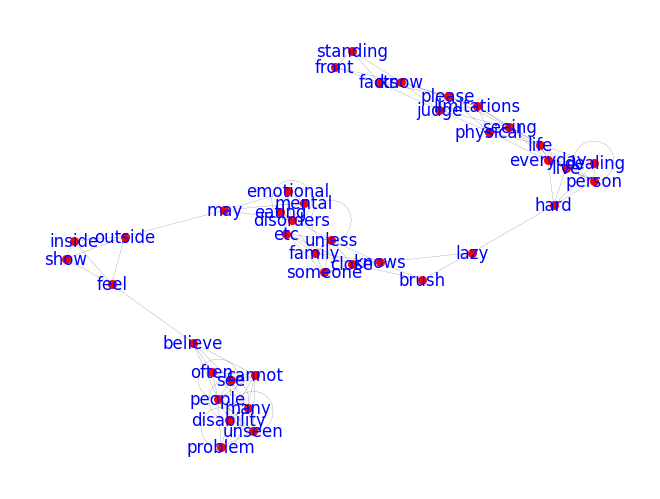

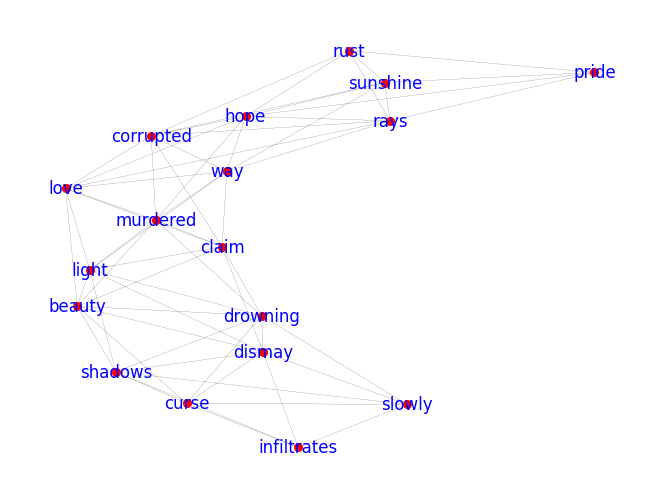

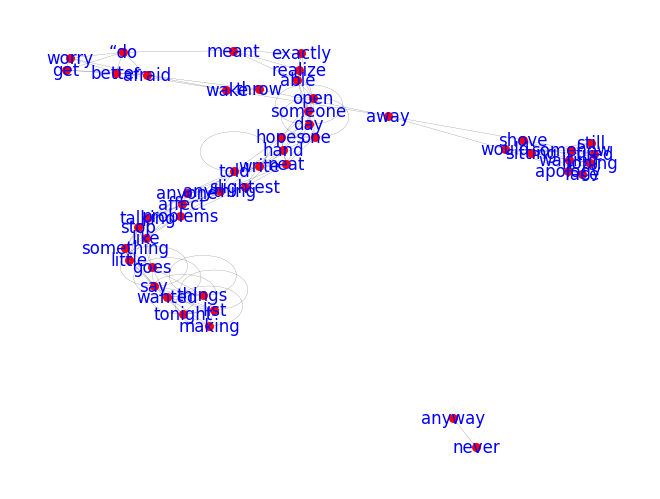

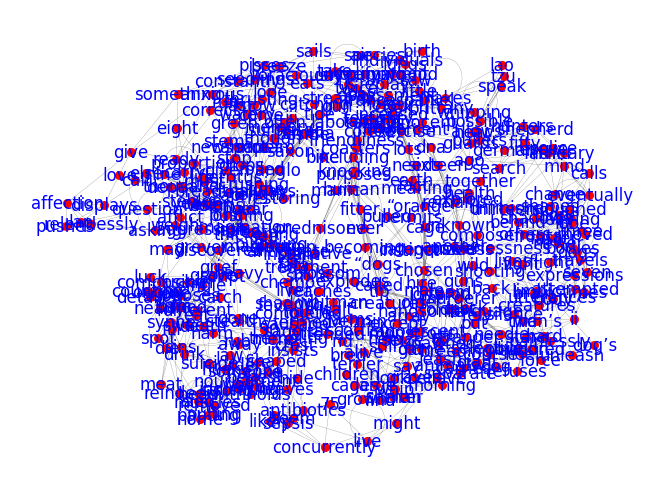

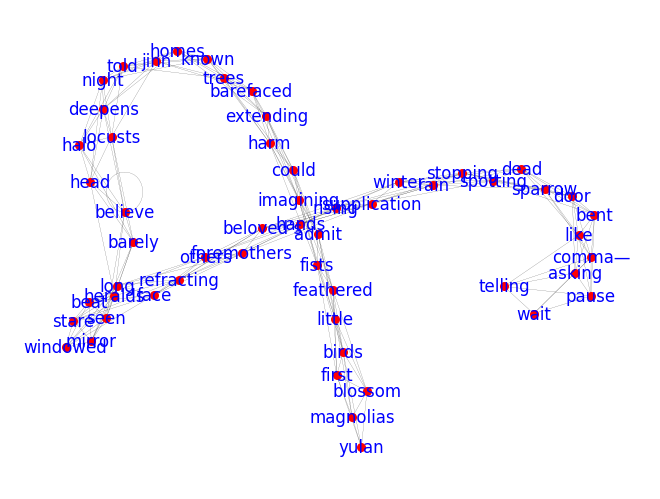

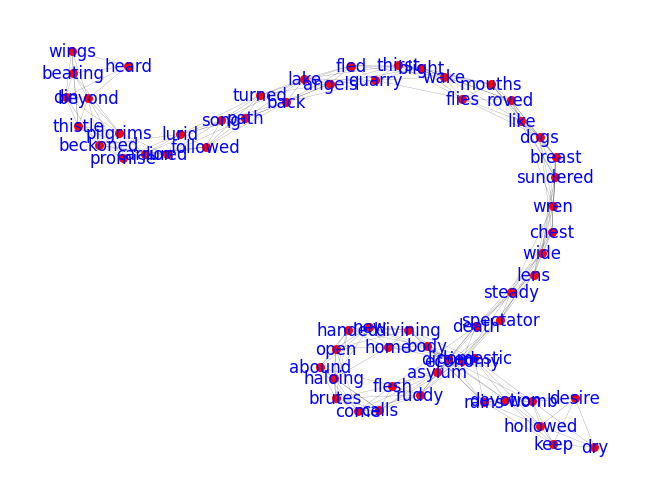

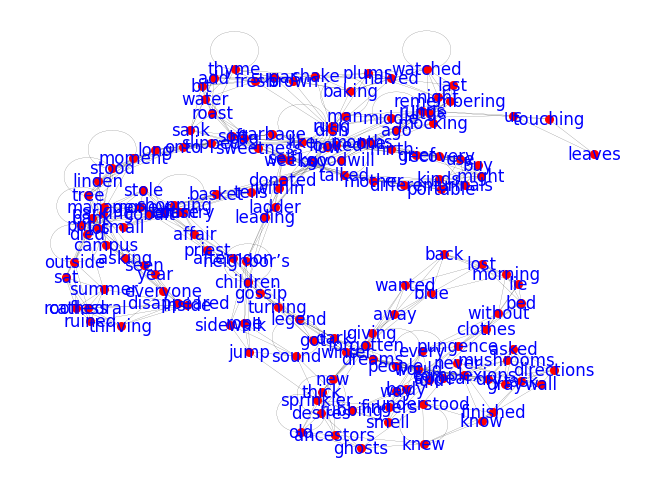

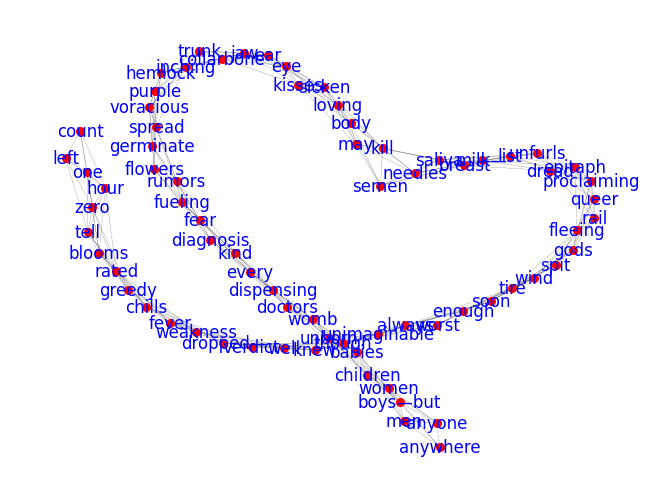

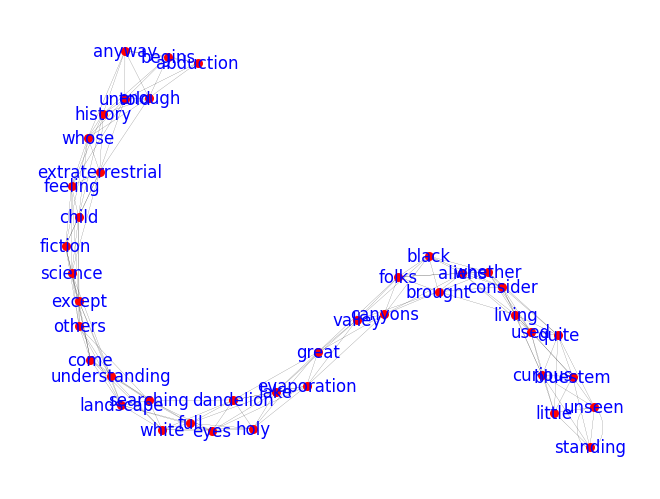

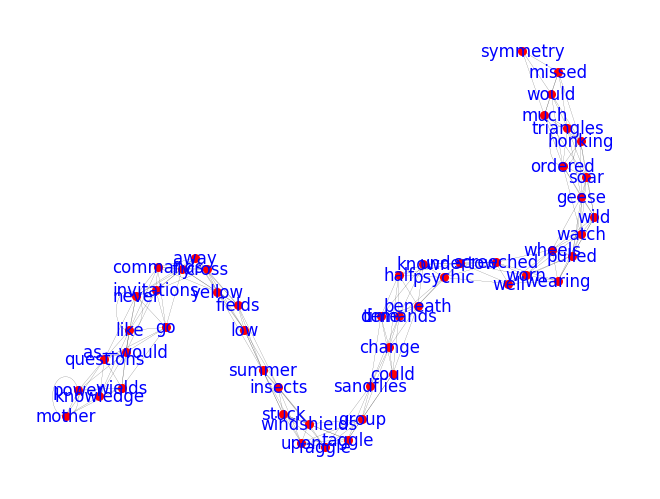

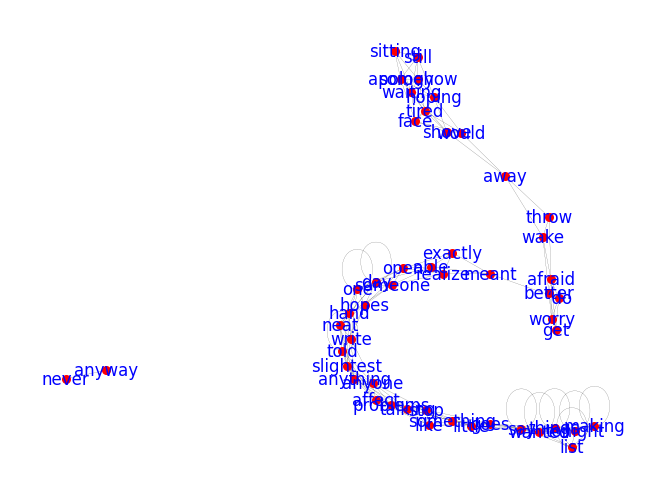

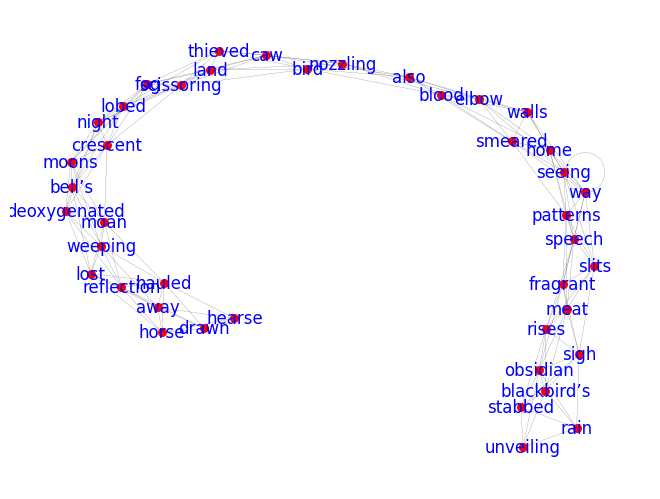

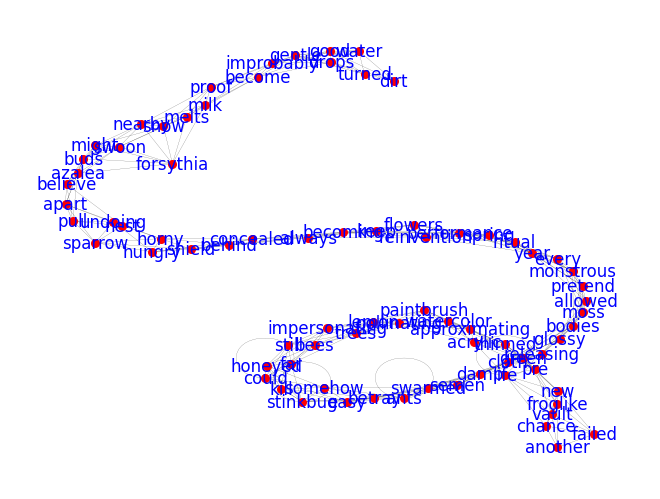

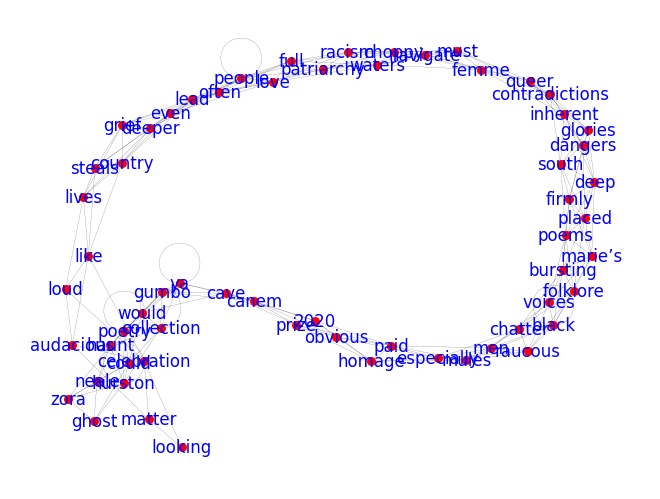

In [ ]:
for poem in poems_list:
    plot_binary_graph(poem)

**Use transitive closure to create larger graphs for each poem.**

In [ ]:
for poem in poems_list:
  binary_graph = create_binary_graph(poem)
  larger_graph = create_larger_graph(binary_graph)
  plot_graph(larger_graph)

Output hidden; open in https://colab.research.google.com to view.

## 1.Plots: distributions of POS [n, v. adj, adv]

In [ ]:
for poem in poems_list :
  sentences = nltk.sent_tokenize(poem)
  words = [nltk.word_tokenize(sentence) for sentence in sentences]
  pos_tags = [nltk.pos_tag(word) for word in words]

print(pos_tags)

[[('if', 'IN'), ('the', 'DT'), ('ghost', 'NN'), ('of', 'IN'), ('zora', 'NNP'), ('neale', 'JJ'), ('hurston', 'NN'), ('could', 'MD'), ('haunt', 'VB'), ('poetry', 'NN'), ('collection', 'NN'), ('it', 'PRP'), ('would', 'MD'), ('be', 'VB'), ('gumbo', 'JJ'), ('ya', 'NN'), ('ya', 'NN'), ('which', 'WDT'), ('won', 'VBD'), ('the', 'DT'), ('cave', 'NN'), ('canem', 'NN'), ('poetry', 'NN'), ('prize', 'NN'), ('in', 'IN'), ('2020', 'CD'), ('obvious', 'JJ'), ('homage', 'NN'), ('is', 'VBZ'), ('paid', 'VBN'), ('to', 'TO'), ('hurston', 'VB'), ('especially', 'RB'), ('mules', 'NNS'), ('and', 'CC'), ('men', 'NNS'), ('with', 'IN'), ('the', 'DT'), ('raucous', 'JJ'), ('chatter', 'NN'), ('of', 'IN'), ('black', 'JJ'), ('voices', 'NNS'), ('and', 'CC'), ('folklore', 'RB'), ('bursting', 'VBG'), ('from', 'IN'), ('marie', 'NN'), ('’', 'NNP'), ('s', 'NN'), ('poems', 'NNS'), ('placed', 'VBD'), ('firmly', 'RB'), ('in', 'IN'), ('the', 'DT'), ('deep', 'JJ'), ('south', 'NN'), ('and', 'CC'), ('all', 'DT'), ('its', 'PRP$'), (

In [ ]:
def count_pos(array):
  pos_counts = collections.defaultdict(int)
  pos_counts.clear()
  for i in range(len(array)):
     for token, pos_tag in array[i]:
       pos_counts[pos_tag] += 1
  return pos_counts

In [ ]:
data_df['count_pos'] = data_df['POS'].apply(count_pos)

In [ ]:
print(data_df['count_pos'][0])

defaultdict(<class 'int'>, {'NN': 29, 'JJ': 9, 'NNS': 3, 'VB': 4, 'RB': 2, 'IN': 4, 'MD': 1, 'VBG': 4})


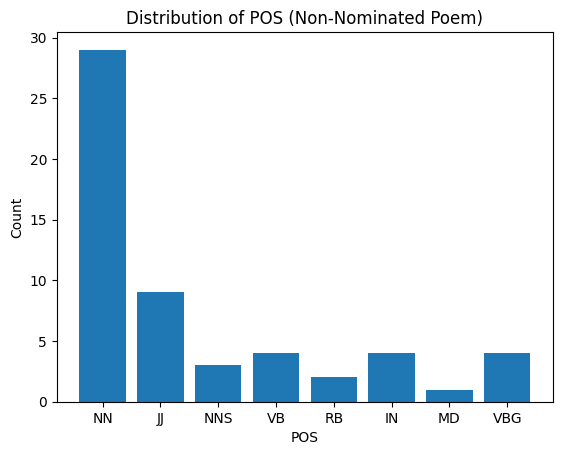

In [ ]:
plot_pos_distribution(data_df['count_pos'][0], 'Non-Nominated Poem')

In [ ]:
data_df.head()

Year            Author                        Title  \
0  2020   Katanya marks              Unseen disability   
1  2023       Dave Muddy                 Pride’s Wrath   
2  2022     Nandini Sethi  The Things I Never Said\n\n   
3  2021  Kathleen A. Dale           A QUESTION OF TIME   
4  2022  SARAH GHAZAL ALI            FEBRUARY AUGURY\n   

                                                Poem  \
0  The problem with a unseen disability is that m...   
1  pride is the rust of sunshine\nrays of hope co...   
2  I’m making a list tonight, \n\nOf all the thin...   
3  i. \nNine thousand years seems long but for th...   
4  Yulan magnolias blossom first\nas birds\n\nlit...   

                                          clean_poem  \
0  the problem with unseen disability is that man...   
1  pride is the rust of sunshine rays of hope cor...   
2  am making list tonight of all the things wante...   
3  nine thousand years seems long but for the ima...   
4  yulan magnolias blossom first as birds little ...   

                                                 POS  \
0  [[(problem, NN)], [(unseen, JJ)], [(disability...   
1  [[(pride, NN)], [(rust, NN)], [(sunshine, NN)]...   
2  [[(making, VBG)], [(list, NN)], [(tonight, NN)...   
3  [[(nine, CD)], [(thousand, NN)], [(year, NN)],...   
4  [[(yulan, NN)], [(magnolia, NNS)], [(blossom, ...   

                                           count_pos  
0  {'NN': 29, 'JJ': 9, 'NNS': 3, 'VB': 4, 'RB': 2...  
1  {'NN': 13, 'VBN': 2, 'VBG': 1, 'RB': 1, 'NNS': 1}  
2  {'VBG': 6, 'NN': 37, 'VBD': 2, 'VB': 7, 'JJ': ...  
3  {'CD': 11, 'NN': 298, 'VBZ': 3, 'RB': 28, 'VB'...  
4  {'NN': 32, 'NNS': 3, 'RB': 3, 'JJ': 2, 'VBN': ...

## 2.Compare the dist of POS in each poem

In [ ]:
pos_distribution(data_df['count_pos'][i])

(['NN', 'MD', 'CD', 'JJ', 'RB', 'NNS', 'VBN', 'IN', 'VBG'],
 [49, 3, 1, 8, 4, 3, 1, 1, 1])

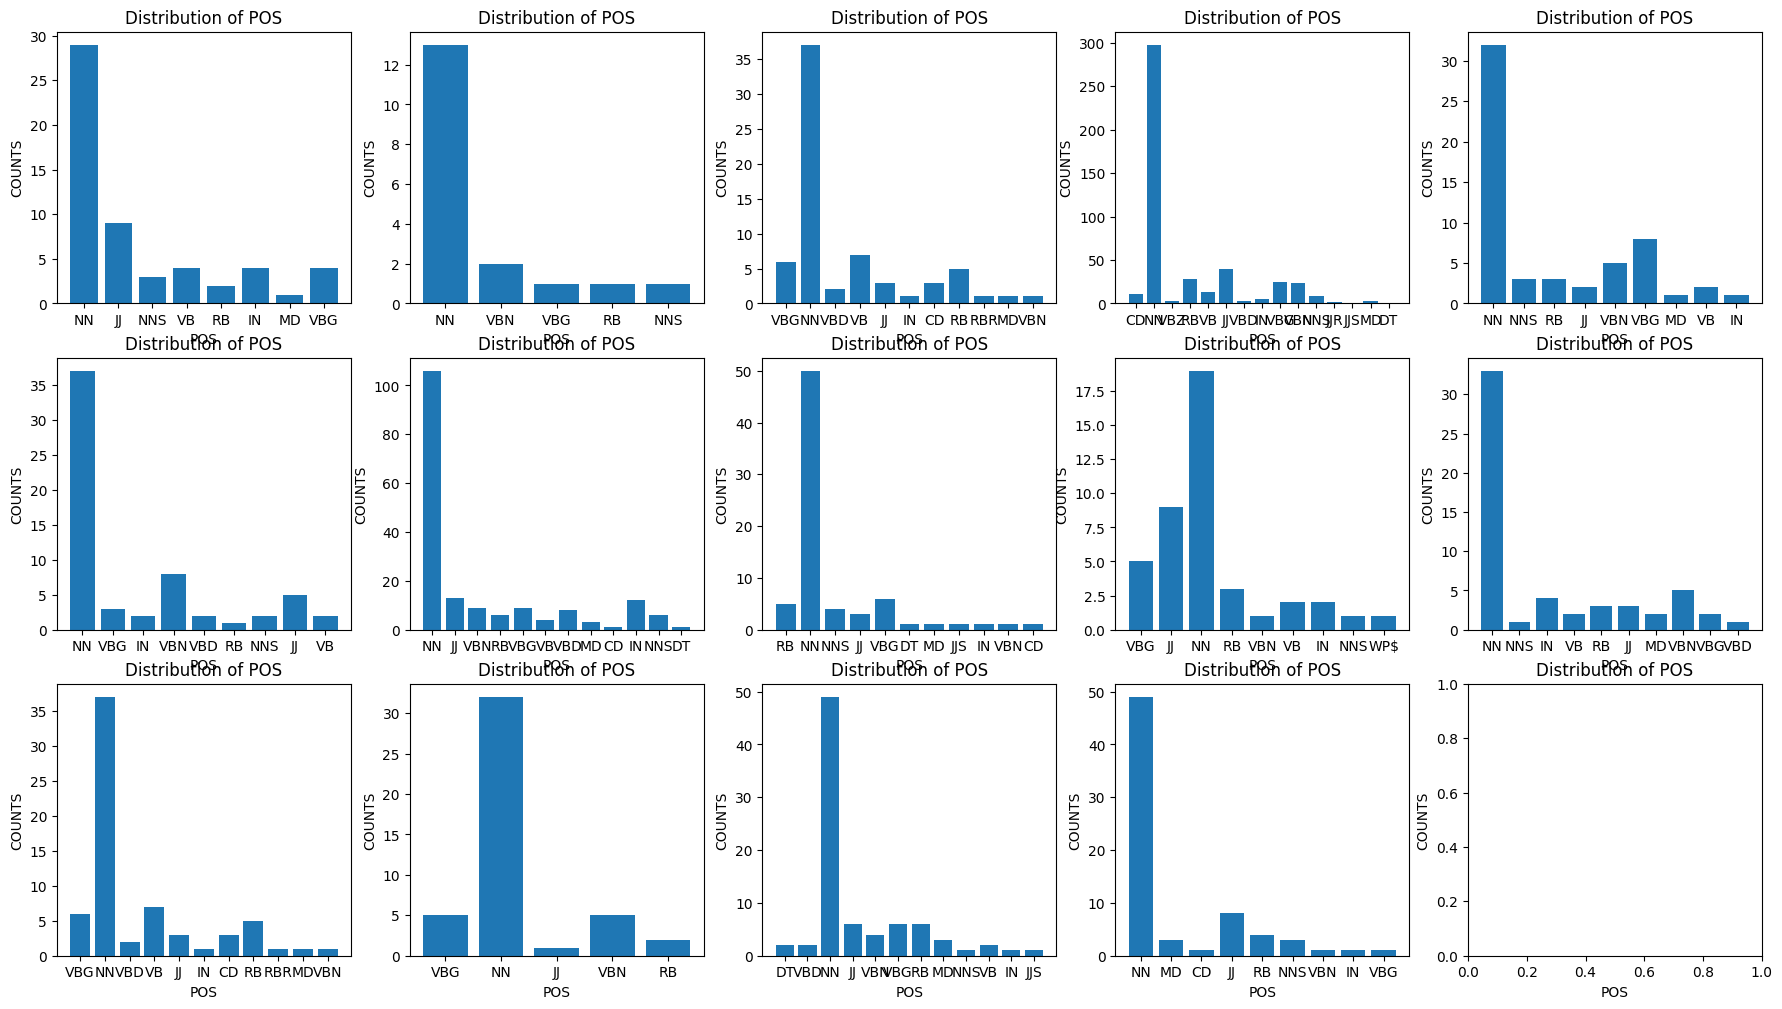

In [ ]:
rows = 3
cols = 5

# Create the plot grid
fig, axs = plt.subplots(rows, cols, figsize=(22,12))

# Flatten the plot grid to access each subplot
axs = axs.flatten()

# Loop through the dataframe rows and plot the data points on each subplot
for i, row in data_df.iterrows():
    x = pos_distribution(row['count_pos'])
    axs[i].bar(x[0], x[1])

for i in range(len(axs)):
    axs[i].set_title(f"Distribution of POS")
    axs[i].set_xlabel("POS")
    axs[i].set_ylabel("COUNTS")

plt.show()

In [ ]:
def buildPoemArray(data):
    poet = {}
    poems = list()
    for i in data:
        idx = "poem"+str(i) ##poem1
        poet[idx+"_title"] = data[i]["Title"] #poem1_title = tien
        poet[idx] = data[i]["clean_poem"] # poem
        poems.append(idx)
    poet['poems_array'] = poems
    return poet

In [ ]:
def extractAllPOS(poet):
    global_vrb = set()
    global_nns = set()
    global_adj = set()
    for key in poet['poems_array']:
        text = poet[key]
        word_list = word_tokenize(text)
        pos_value = nltk.pos_tag(word_list)
        poet["pos_"+key] = pos_value

        vrb = set([word for (word, pos) in pos_value if (pos.startswith('VB'))])
        nns = set([word for (word, pos) in pos_value if (pos.startswith('NN'))])
        adj = set([word for (word, pos) in pos_value if (pos.startswith('JJ'))])

        poet["verbs_"+key] = list(vrb)
        poet["nouns_"+key] = list(nns)
        poet["adjectives_"+key] = list(adj)

        global_vrb = set.union(global_vrb, vrb)
        global_nns = set.union(global_nns, nns)
        global_adj = set.union(global_adj, adj)

    poet["all_verbs"] = list(global_vrb)
    poet["all_nouns"] = list(global_nns)
    poet["all_adjectives"] = list(global_adj)

In [ ]:
def getPOS(file_name, df):
    pos = ""
    if os.path.exists(file_name):
        with open(file_name, 'r') as file:
            pos = json.load(file)
    else:
        pos = buildPoemArray(json.loads(df.to_json(orient="index")))
        extractAllPOS(pos)
        with open(file_name, 'w') as file:
            json.dump(pos, file)
    return pos

In [ ]:
file_name = store_location + "Non_nominated_poems_pos.json"
pc_pos = getPOS(file_name, data_df)

In [ ]:
def count_pos(tokens):
    pos_counts = nltk.FreqDist(tag for word, tag in nltk.pos_tag(tokens))
    return pos_counts

## 3.Superimpose them on each other in terms of ratios of POS

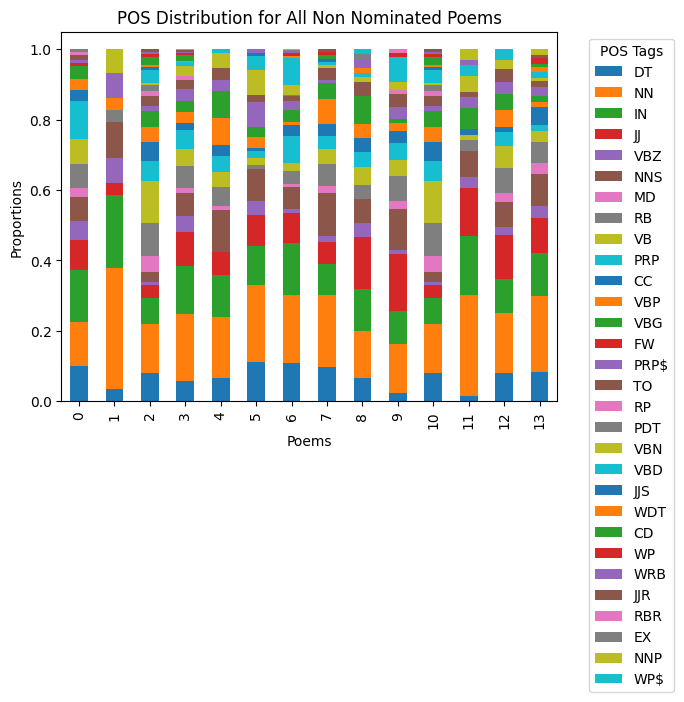

In [ ]:
process_and_plot_pos(poems_list, "All Non Nominated Poems")

## 4.Gold/reference standard
 → What did the nominated poems have in common (common denominator)

In [ ]:
for poem in poems_Non_Nominated:
    print(poem)
    print("--------------------------------------------------\n")

The problem with a unseen disability is that many people can't see it and often don't believe you have it
The problem with an unseen disability is you feel it on the inside and it doesn't show on the outside
The problem with an unseen disability is it may be mental disorders emotional disorders eating disorders etc and unless your family or someone close to you knows of the problem people will just brush you off as being lazy
The problem with an unseen disability is it is hard for the person dealing with them to live everyday life just as it is for people with seeing physical limitations so please don't judge unless you know the facts about the person standing in front of you
--------------------------------------------------

pride is the rust of sunshine
rays of hope corrupted by its way,
love is murdered by its claim
light of beauty, drowning in dismay.

shadows curse slowly infiltrates
--------------------------------------------------

I’m making a list tonight, 

Of all the thing

In [ ]:
import nltk
from collections import Counter

# Assuming you have already loaded the poems into the 'poems_NonNominated' list

pos_counts_n = []
for poem in poems_Non_Nominated:
    words_n = nltk.word_tokenize(poem)
    pos_tags_n = nltk.pos_tag(words_n)  # Fix variable name 'words_n'
    pos_counts_n.append(Counter([tag for word, tag in pos_tags_n]))  # Fix variable name 'pos_tags_n'

# Combine POS counts for all poems
total_counts_n = Counter()
for counts in pos_counts_n:
    total_counts_n += counts

# Calculate total number of words across all poems
total_words_n = sum(total_counts_n.values())

# Calculate proportion of each POS tag
pos_proportions_n = {tag: count / total_words_n for tag, count in total_counts_n.items()}

# Identify most common POS tags
most_common_n = total_counts_n.most_common(5)  # Top 5 most common tags

# Print results
print("Most common POS tags for Non Nominated Poems:")
for tag, count in most_common_n:
    print(f"{tag}: {count} ({pos_proportions_n[tag]:.2%})")


Most common POS tags for Non Nominated Poems:
NN: 433 (15.01%)
IN: 288 (9.98%)
DT: 237 (8.21%)
,: 227 (7.87%)
JJ: 209 (7.24%)


## 5.Plot stats

In [ ]:
print(most_common_n)

[('NN', 433), ('IN', 288), ('DT', 237), (',', 227), ('JJ', 209)]


In [ ]:
print(pos_proportions_n)

{'DT': 0.08214904679376084, 'NN': 0.15008665511265165, 'IN': 0.0998266897746967, 'JJ': 0.07244367417677643, 'VBZ': 0.02703639514731369, 'NNS': 0.05233968804159445, 'MD': 0.011438474870017331, 'RB': 0.042634315424610054, 'VB': 0.03743500866551126, 'PRP': 0.06620450606585788, 'CC': 0.023570190641247834, 'VBP': 0.028769497400346622, 'VBG': 0.029116117850953208, 'FW': 0.0003466204506065858, 'PRP$': 0.021837088388214906, 'TO': 0.020450606585788563, 'RP': 0.0038128249566724438, 'PDT': 0.0020797227036395147, 'VBN': 0.019064124783362217, ',': 0.07868284228769497, '.': 0.04055459272097054, 'VBD': 0.01975736568457539, ':': 0.007972270363951473, 'NNP': 0.030155979202772965, 'WDT': 0.0027729636048526864, 'CD': 0.007279029462738302, 'WP': 0.0038128249566724438, 'WRB': 0.0034662045060658577, "''": 0.0006932409012131716, '(': 0.004506065857885615, ')': 0.004506065857885615, 'JJR': 0.0020797227036395147, 'JJS': 0.0010398613518197574, 'RBR': 0.0010398613518197574, 'EX': 0.0006932409012131716, 'WP$': 0.

In [ ]:
sorted_pos_percentages_n = {k: v for k, v in sorted(pos_proportions_n.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
for tag, count in most_common_n:
  sorted_pos_percentages_n = {k: v for k, v in sorted(pos_proportions_n.items(), key=lambda item: item[1], reverse=True)}

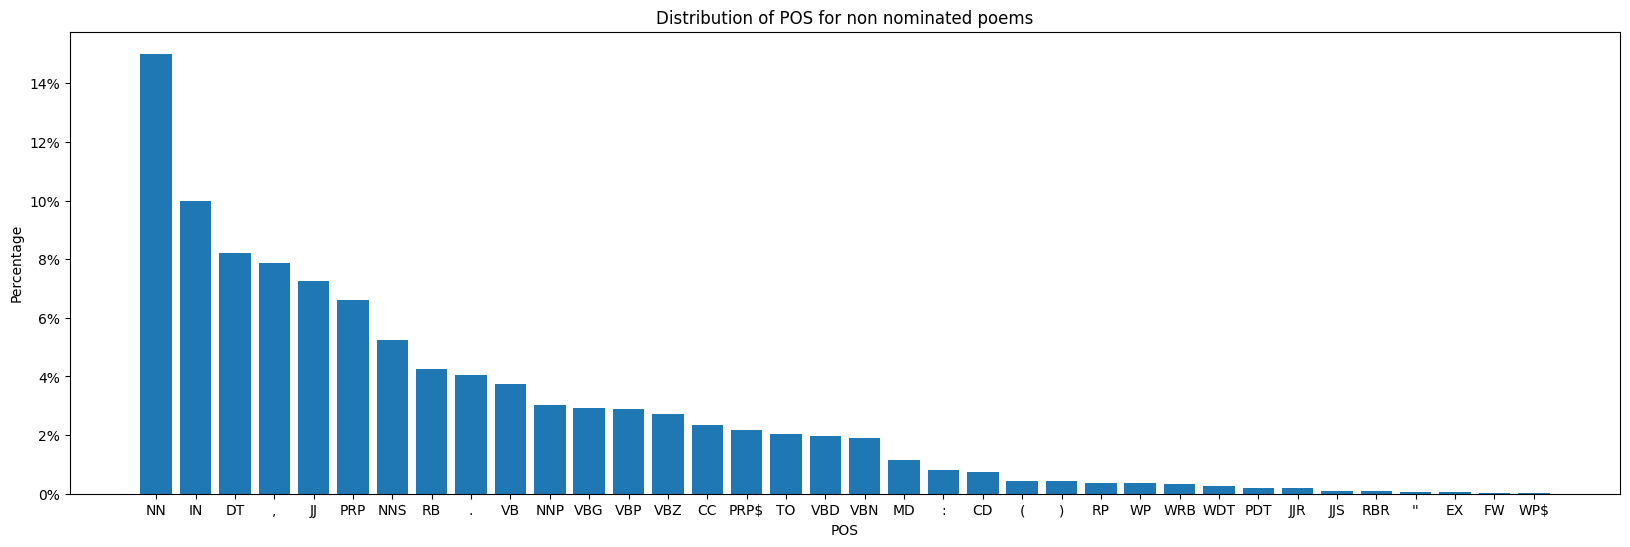

In [ ]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(20, 6))  # Adjust the width and height as needed

def to_percentage(y, _):
    return f'{y * 100:.0f}%'

formatter = FuncFormatter(to_percentage)

ax.bar(sorted_pos_percentages_n.keys(), sorted_pos_percentages_n.values())
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('POS')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of POS for non nominated poems')

plt.show()

In [ ]:
most_common_pos = {}
for tag, count in most_common_n:
  most_common_pos[tag] = pos_proportions_n[tag]

In [ ]:
print(most_common_pos)

{'NN': 0.15008665511265165, 'IN': 0.0998266897746967, 'DT': 0.08214904679376084, ',': 0.07868284228769497, 'JJ': 0.07244367417677643}


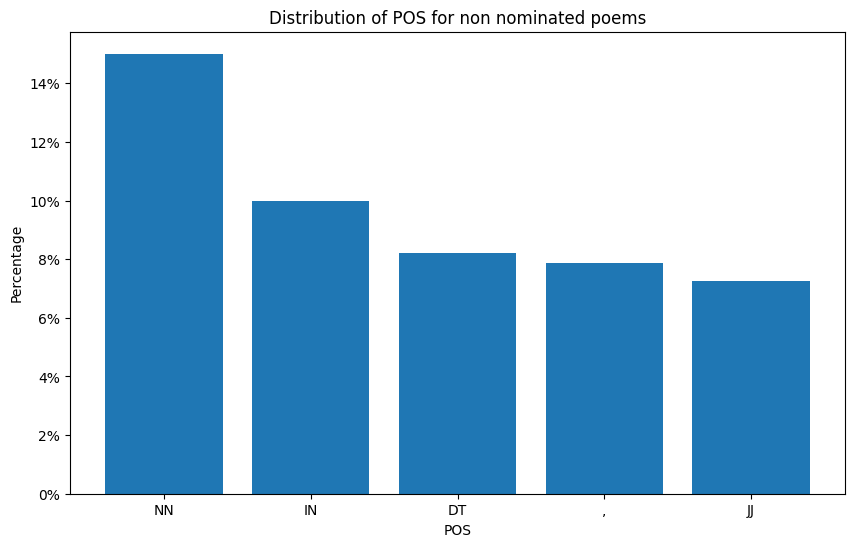

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.bar(most_common_pos.keys(), most_common_pos.values())

# Apply the custom formatter to the y-axis
ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('POS')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of POS for non nominated poems')

plt.show()

# B. Topic

In [ ]:
data_df.head()

Year            Author                        Title  \
0  2020   Katanya marks              Unseen disability   
1  2023       Dave Muddy                 Pride’s Wrath   
2  2022     Nandini Sethi  The Things I Never Said\n\n   
3  2021  Kathleen A. Dale           A QUESTION OF TIME   
4  2022  SARAH GHAZAL ALI            FEBRUARY AUGURY\n   

                                                Poem  \
0  The problem with a unseen disability is that m...   
1  pride is the rust of sunshine\nrays of hope co...   
2  I’m making a list tonight, \n\nOf all the thin...   
3  i. \nNine thousand years seems long but for th...   
4  Yulan magnolias blossom first\nas birds\n\nlit...   

                                          clean_poem  \
0  the problem with unseen disability is that man...   
1  pride is the rust of sunshine rays of hope cor...   
2  am making list tonight of all the things wante...   
3  nine thousand years seems long but for the ima...   
4  yulan magnolias blossom first as birds little ...   

                                                 POS  \
0  [[(problem, NN)], [(unseen, JJ)], [(disability...   
1  [[(pride, NN)], [(rust, NN)], [(sunshine, NN)]...   
2  [[(making, VBG)], [(list, NN)], [(tonight, NN)...   
3  [[(nine, CD)], [(thousand, NN)], [(year, NN)],...   
4  [[(yulan, NN)], [(magnolia, NNS)], [(blossom, ...   

                                           count_pos  
0  {'NN': 29, 'JJ': 9, 'NNS': 3, 'VB': 4, 'RB': 2...  
1  {'NN': 13, 'VBN': 2, 'VBG': 1, 'RB': 1, 'NNS': 1}  
2  {'VBG': 6, 'NN': 37, 'VBD': 2, 'VB': 7, 'JJ': ...  
3  {'CD': 11, 'NN': 298, 'VBZ': 3, 'RB': 28, 'VB'...  
4  {'NN': 32, 'NNS': 3, 'RB': 3, 'JJ': 2, 'VBN': ...

In [ ]:
# Preprocess the poems
preprocessed_corpus = []
for poem in poems_list:
    # Tokenize the poem
    tokens = nltk.word_tokenize(poem)

    # Remove stop words and lemmatize words
    processed_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]

    # Add processed tokens to preprocessed_corpus
    preprocessed_corpus.append(processed_tokens)

# Create dictionary and bag-of-words representations of poems
dictionary = corpora.Dictionary(preprocessed_corpus)
bow_corpus = [dictionary.doc2bow(poem) for poem in preprocessed_corpus]

# Create the document-term matrix
dtm = corpora.MmCorpus.serialize('dtm_corpus.mm', bow_corpus)

In [ ]:
 #Preprocess the poems
dictionary = corpora.Dictionary(preprocessed_corpus)
corpus = [dictionary.doc2bow(poem) for poem in preprocessed_corpus]

In [ ]:
from gensim.models import LdaModel

# Train an LDA model on the document-term matrix
lda_model = LdaModel(dtm, num_topics=5, id2word=dictionary, passes=10)

In [ ]:
from gensim.models import CoherenceModel

# Compute the coherence score of the model
coherence_score = CoherenceModel(model=lda_model, texts=preprocessed_corpus, dictionary=dictionary, coherence='c_v').get_coherence()

print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.6602135151693084


In [ ]:
for topic_num, topic_words in lda_model.show_topics(num_topics=-1, num_words=10):
    print(f"Topic {topic_num+1}: {topic_words}")

Topic 1: 0.001*"hearse" + 0.001*"screeched" + 0.001*"telling" + 0.001*"u" + 0.001*"dark" + 0.001*"scream" + 0.001*"soft" + 0.001*"germinate" + 0.001*"impersonating" + 0.001*"symmetry"
Topic 2: 0.001*"abduction" + 0.001*"fleeing" + 0.001*"soar" + 0.001*"problem" + 0.001*"body" + 0.001*"anything" + 0.001*"gray" + 0.001*"psychic" + 0.001*"lurid" + 0.001*"could"
Topic 3: 0.002*"nearby" + 0.001*"understanding" + 0.001*"puppyhood" + 0.001*"animal" + 0.001*"oblivion" + 0.001*"lazy" + 0.001*"telling" + 0.001*"anywhere" + 0.001*"neale" + 0.001*"beauty"
Topic 4: 0.001*"roved" + 0.001*"treatment" + 0.001*"sugar" + 0.001*"pain" + 0.001*"puppyhood" + 0.001*"never" + 0.001*"dread" + 0.001*"imagination" + 0.001*"pretend" + 0.001*"lot"
Topic 5: 0.001*"death" + 0.001*"corrupted" + 0.001*"rung" + 0.001*"need" + 0.001*"insect" + 0.001*"wearing" + 0.001*"roast" + 0.001*"ya" + 0.001*"germinate" + 0.001*"canem"


In [ ]:
preprocessed_corpus = []
    # Tokenize the poem
tokens = nltk.word_tokenize(data_df['clean_poem'][0])

    # Remove stop words and lemmatize words
processed_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]

    # Add processed tokens to preprocessed_corpus
preprocessed_corpus.append(processed_tokens)

# Create dictionary and bag-of-words representations of poems
dictionary = corpora.Dictionary(preprocessed_corpus)
bow_corpus = [dictionary.doc2bow(poem) for poem in preprocessed_corpus]

# Create the document-term matrix
dtm_p1 = corpora.MmCorpus.serialize('dtm_corpus.mm', bow_corpus)

lda_model_p1 = LdaModel(dtm_p1, num_topics=5, id2word=dictionary, passes=10)

coherence_score_p1 = CoherenceModel(model=lda_model_p1, texts=preprocessed_corpus, dictionary=dictionary, coherence='c_v').get_coherence()

print(f"Coherence Score: {coherence_score}")

for topic_num, topic_words in lda_model_p1.show_topics(num_topics=-1, num_words=10):
    print(f"Topic {topic_num+1}: {topic_words}")

Coherence Score: 0.6602135151693084
Topic 1: 0.032*"see" + 0.030*"often" + 0.030*"someone" + 0.029*"front" + 0.028*"believe" + 0.028*"person" + 0.028*"family" + 0.027*"disorder" + 0.027*"dealing" + 0.027*"know"
Topic 2: 0.031*"often" + 0.030*"seeing" + 0.030*"many" + 0.028*"fact" + 0.028*"feel" + 0.028*"hard" + 0.028*"believe" + 0.027*"people" + 0.027*"emotional" + 0.027*"front"
Topic 3: 0.029*"please" + 0.029*"believe" + 0.029*"disorder" + 0.029*"mental" + 0.028*"seeing" + 0.028*"dealing" + 0.028*"disability" + 0.028*"etc" + 0.027*"lazy" + 0.027*"hard"
Topic 4: 0.030*"emotional" + 0.030*"may" + 0.029*"often" + 0.029*"people" + 0.028*"disability" + 0.028*"judge" + 0.027*"seeing" + 0.027*"outside" + 0.027*"etc" + 0.027*"live"
Topic 5: 0.030*"someone" + 0.030*"show" + 0.029*"fact" + 0.029*"brush" + 0.028*"etc" + 0.028*"feel" + 0.028*"emotional" + 0.028*"please" + 0.027*"dealing" + 0.027*"disorder"


In [ ]:
def topic_model(poem):
  vectorizer = CountVectorizer()
  doc_term_matrix = vectorizer.fit_transform(poem)
  lda_model = LatentDirichletAllocation(n_components=5, random_state=0)
  lda_model.fit(doc_term_matrix)
  for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {' '.join([vectorizer.get_feature_names()[index] for index in topic.argsort()[:-11:-1]])}")

In [ ]:
def docterm_matrix(poem):
  poem = poem.translate(str.maketrans('', '', string.punctuation))
  print(poem)
  poem = poem.lower()
  words = word_tokenize(poem)
  stop_words = set(stopwords.words('english'))
  words = [word for word in words if word not in stop_words]
  vectorizer = CountVectorizer()
  doc_term_matrix = vectorizer.fit_transform([' '.join(words)])
  return doc_term_matrix.toarray()

In [ ]:
data_df['doc_term_matrix'] = 4

# C. Sentiment Analysis

## 1.Analyze sentiments for the prize winning poems of that year

In [ ]:
poem1 = data_df['clean_poem'][0]

In [ ]:
data_df['sentiment'] = {}

In [ ]:
def check_sentiment(poem):
  sid = SentimentIntensityAnalyzer()
  scores = sid.polarity_scores(poem)
  return scores

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
for i in range(len(data_df)):
  poem = data_df['clean_poem'][i]
  data_df['sentiment'][i] = check_sentiment(poem)

In [ ]:
data_df.head()

Year            Author                        Title  \
0  2020   Katanya marks              Unseen disability   
1  2023       Dave Muddy                 Pride’s Wrath   
2  2022     Nandini Sethi  The Things I Never Said\n\n   
3  2021  Kathleen A. Dale           A QUESTION OF TIME   
4  2022  SARAH GHAZAL ALI            FEBRUARY AUGURY\n   

                                                Poem  \
0  The problem with a unseen disability is that m...   
1  pride is the rust of sunshine\nrays of hope co...   
2  I’m making a list tonight, \n\nOf all the thin...   
3  i. \nNine thousand years seems long but for th...   
4  Yulan magnolias blossom first\nas birds\n\nlit...   

                                          clean_poem  \
0  the problem with unseen disability is that man...   
1  pride is the rust of sunshine rays of hope cor...   
2  am making list tonight of all the things wante...   
3  nine thousand years seems long but for the ima...   
4  yulan magnolias blossom first as birds little ...   

                                                 POS  \
0  [[(problem, NN)], [(unseen, JJ)], [(disability...   
1  [[(pride, NN)], [(rust, NN)], [(sunshine, NN)]...   
2  [[(making, VBG)], [(list, NN)], [(tonight, NN)...   
3  [[(nine, CD)], [(thousand, NN)], [(year, NN)],...   
4  [[(yulan, NN)], [(magnolia, NNS)], [(blossom, ...   

                                           count_pos  doc_term_matrix  \
0  {'NN': 29, 'JJ': 9, 'NNS': 3, 'VB': 4, 'RB': 2...                4   
1  {'NN': 13, 'VBN': 2, 'VBG': 1, 'RB': 1, 'NNS': 1}                4   
2  {'VBG': 6, 'NN': 37, 'VBD': 2, 'VB': 7, 'JJ': ...                4   
3  {'CD': 11, 'NN': 298, 'VBZ': 3, 'RB': 28, 'VB'...                4   
4  {'NN': 32, 'NNS': 3, 'RB': 3, 'JJ': 2, 'VBN': ...                4   

                                           sentiment  
0  {'neg': 0.123, 'neu': 0.844, 'pos': 0.033, 'co...  
1  {'neg': 0.222, 'neu': 0.436, 'pos': 0.342, 'co...  
2  {'neg': 0.063, 'neu': 0.77, 'pos': 0.166, 'com...  
3  {'neg': 0.13, 'neu': 0.79, 'pos': 0.08, 'compo...  
4  {'neg': 0.095, 'neu': 0.864, 'pos': 0.041, 'co...

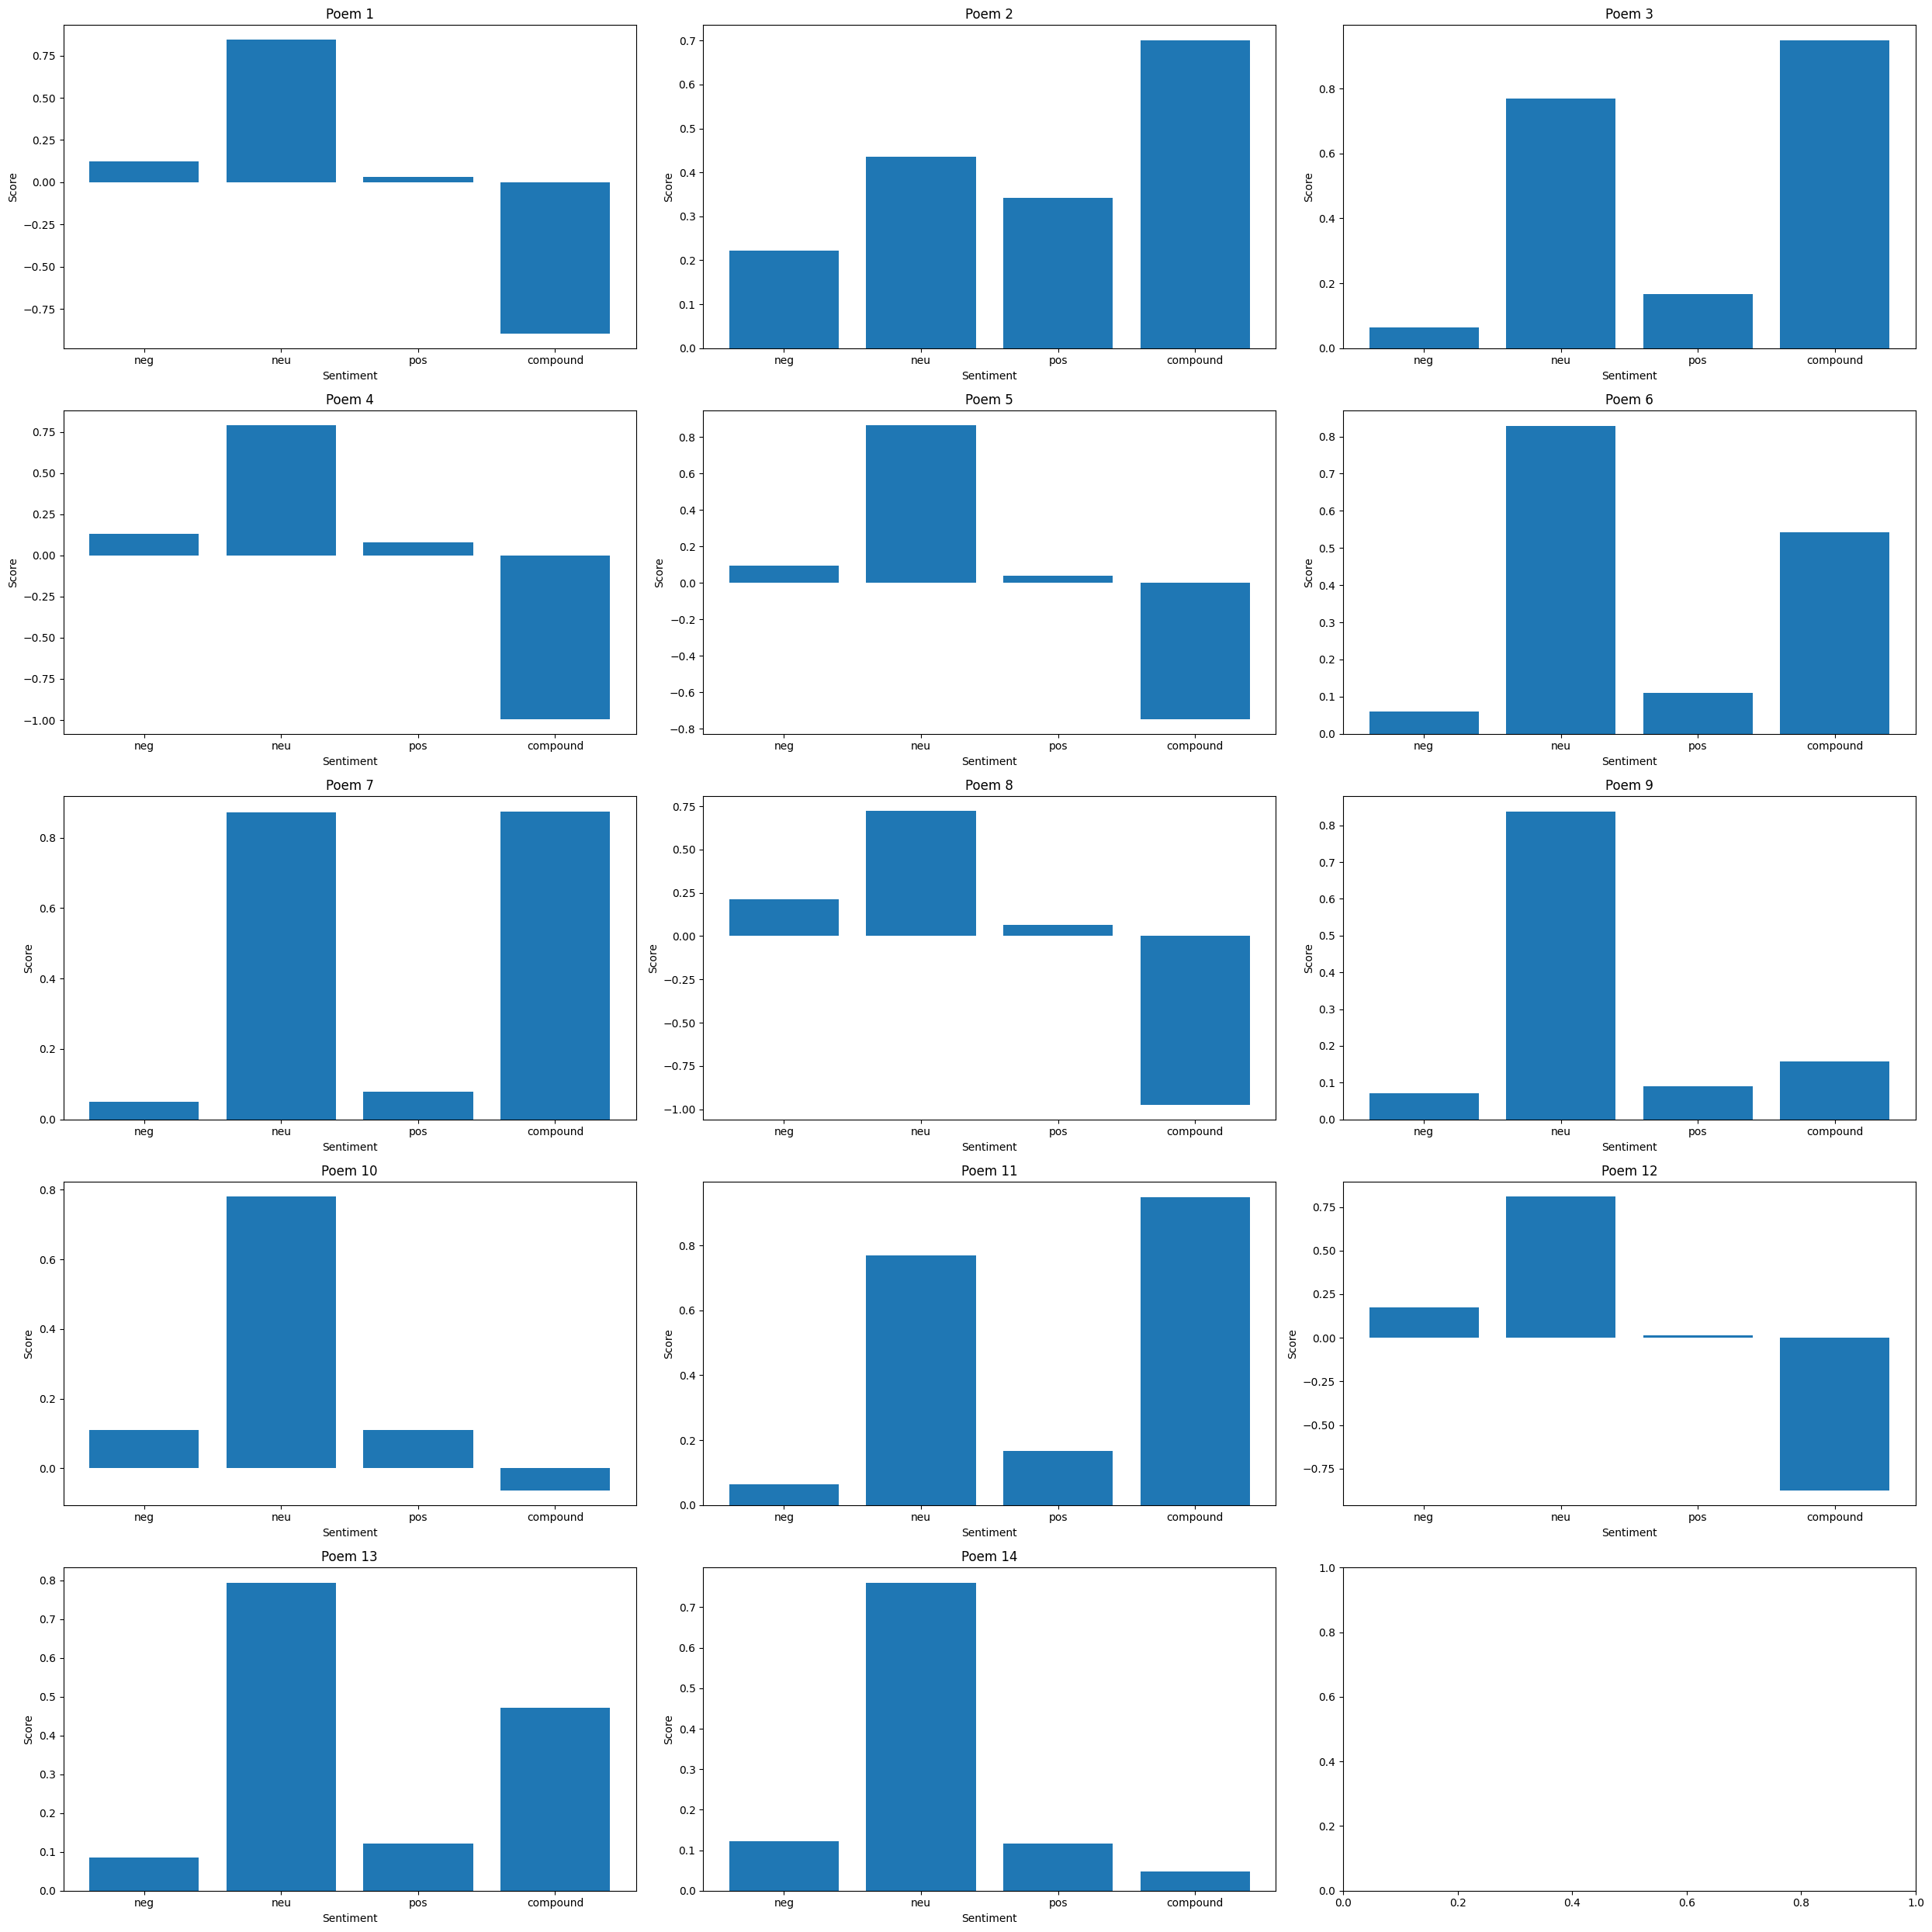

In [ ]:
num_poems = len(data_df)
num_subplots_per_row = 3

# Calculate the number of rows and columns for subplots
num_rows = (num_poems - 1) // num_subplots_per_row + 1
num_cols = min(num_poems, num_subplots_per_row)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(25, 25))

for i in range(num_poems):
    row = i // num_subplots_per_row
    col = i % num_subplots_per_row

    if num_rows == 1:
        ax = axs[col]
    else:
        ax = axs[row, col]

    plot_dist_sentiment(data_df['sentiment'][i], ax)
    ax.set_title(f'Poem {i + 1}')

plt.tight_layout()
plt.show()

In [ ]:
# Define the full file path
json_file_path = os.path.join(store_location, "Non_nominated_poems_processed.json")

# Save the DataFrame to the JSON file
data_df.to_json(json_file_path, orient='records', lines=True)

In [ ]:
poems_nn = data = pd.read_json(json_file_path, lines=True)

In [ ]:
poems_nn

Year            Author                               Title  \
0   2020   Katanya marks                     Unseen disability   
1   2023       Dave Muddy                        Pride’s Wrath   
2   2022     Nandini Sethi         The Things I Never Said\n\n   
3   2021  Kathleen A. Dale                  A QUESTION OF TIME   
4   2022  SARAH GHAZAL ALI                   FEBRUARY AUGURY\n   
5   2022  SARAH GHAZAL ALI                  PARABLE OF FLIES\n   
6   2022        RICK BAROT                            GOODWILL   
7   2022         RITA DOVE                            WRETCHED   
8   2022        RIO CORTEZ          COVERED WAGON AS SPACESHIP   
9   2022        Sally Cook                What Geese May Teach   
10  2022     Nandini Sethi             The Things I Never Said   
11  2023    SHERWIN BITSUI                           Unveiling   
12  2021       NATASHA RAO  IN MY NEXT LIFE LET ME BE A TOMATO   
13  2021    Aurielle Marie                         Gumbo Ya Ya   

                                                 Poem  \
0   The problem with a unseen disability is that m...   
1   pride is the rust of sunshine\nrays of hope co...   
2   I’m making a list tonight, \n\nOf all the thin...   
3   i. \nNine thousand years seems long but for th...   
4   Yulan magnolias blossom first\nas birds\n\nlit...   
5   I heard them, wings beating\na din beyond the ...   
6   When I put the small cobalt vase into the shop...   
7   Anywhere. Anyone. Men, boys—but women, too, an...   
8   Standing unseen in the little bluestem,\ncurio...   
9   My mother had the power that knowledge wields,...   
10  I’m making a list tonight, \n\nOf all the thin...   
11  In this unveiling: a rain-stabbed\nblackbird’s...   
12  Another failed chance to vault froglike\ninto ...   
13  If the ghost of Zora Neale Hurston could haunt...   

                                           clean_poem  \
0   the problem with unseen disability is that man...   
1   pride is the rust of sunshine rays of hope cor...   
2   am making list tonight of all the things wante...   
3   nine thousand years seems long but for the ima...   
4   yulan magnolias blossom first as birds little ...   
5   heard them wings beating din beyond the thistl...   
6   when put the small cobalt vase into the shoppi...   
7   anywhere anyone men boys—but women too and chi...   
8   standing unseen in the little bluestem curious...   
9   my mother had the power that knowledge wields ...   
10  am making list tonight of all the things wante...   
11  in this unveiling rain stabbed blackbird’s obs...   
12  another failed chance to vault froglike into n...   
13  if the ghost of zora neale hurston could haunt...   

                                                  POS  \
0   [[[problem, NN]], [[unseen, JJ]], [[disability...   
1   [[[pride, NN]], [[rust, NN]], [[sunshine, NN]]...   
2   [[[making, VBG]], [[list, NN]], [[tonight, NN]...   
3   [[[nine, CD]], [[thousand, NN]], [[year, NN]],...   
4   [[[yulan, NN]], [[magnolia, NNS]], [[blossom, ...   
5   [[[heard, NN]], [[wing, VBG]], [[beating, NN]]...   
6   [[[put, NN]], [[small, JJ]], [[cobalt, NN]], [...   
7   [[[anywhere, RB]], [[anyone, NN]], [[men, NNS]...   
8   [[[standing, VBG]], [[unseen, JJ]], [[little, ...   
9   [[[mother, NN]], [[power, NN]], [[knowledge, N...   
10  [[[making, VBG]], [[list, NN]], [[tonight, NN]...   
11  [[[unveiling, VBG]], [[rain, NN]], [[stabbed, ...   
12  [[[another, DT]], [[failed, VBD]], [[chance, N...   
13  [[[ghost, NN]], [[zora, NN]], [[neale, NN]], [...   

                                            count_pos  doc_term_matrix  \
0   {'NN': 29, 'JJ': 9, 'NNS': 3, 'VB': 4, 'RB': 2...                4   
1   {'NN': 13, 'VBN': 2, 'VBG': 1, 'RB': 1, 'NNS': 1}                4   
2   {'VBG': 6, 'NN': 37, 'VBD': 2, 'VB': 7, 'JJ': ...                4   
3   {'CD': 11, 'NN': 298, 'VBZ': 3, 'RB': 28, 'VB'...                4   
4   {'NN': 32, 'NNS': 3, 'RB': 3, 'JJ': 2, 'VBN': ...                4   
5

#D. Analyze and Rank the "new" poems
Analyze and Rank the "new" poems relative to the pushcart nominated ones. Devise a ranking system . Compare new poems and some other pushcart nominees with the gold standard so you establish a baseline .


**Data Description:**
- Two datasets are available:
  - `data_nominated_poem` containing information about poems nominated for the Pushcart Prize.
  - `data_non_nominated_poem` comprising details of "new" poems.

**Text Preprocessing:**
- The preprocessing stage involves text cleaning and tokenization.
- Common English stopwords are removed to enhance the quality of the text data.

**Doc2Vec Model:**
- The Doc2Vec model is employed to convert the text data into numerical vectors.
- This model represents the semantic content of the text by learning word embeddings.

**Similarity Analysis:**
- The cosine similarity metric is utilized to measure the similarity between poems.
- Specifically, poems are compared to one another based on their vector representations.
- Poems are ranked based on their similarity to a reference poem, which is often the first poem in the dataset.

**Ranking "New" Poems:**
- For "new" poems, the analysis involves:
  - Inferring vectors using the pre-trained Doc2Vec model.
  - Calculating the similarity of each "new" poem to the nominated poems.
  - Determining the most similar nominated poem for each "new" poem.
  - Establishing a ranking based on the maximum similarity score to any nominated poem.


In [ ]:
store_location_n = "/content/drive/Shareddrives/ML_2023/nlp/pushcart/"
json_filename = "Pushcart_nominated_poems_processed.json"
pushcart_nominated = store_location_n + json_filename
print(pushcart_nominated )
data_n = pd.read_json(pushcart_nominated ,lines=True)

/content/drive/Shareddrives/ML_2023/nlp/pushcart/Pushcart_nominated_poems_processed.json


In [ ]:
store_location_nn = "/content/drive/Shareddrives/ML_2023/nlp/non_nominated/"
json_filename = "Non_nominated_poems_processed.json"
pushcart_non_nominated = store_location_nn + json_filename
data_nn = pd.read_json(pushcart_non_nominated ,lines=True)

In [ ]:
data_n.head(2)

Year              Author                   Title  \
0  2023  Christopher Hunter  LOUISA, AGE 6, AT REST   
1  2023        Susan J Koch                   SOFIA   

                                                Poem  \
0  Louisa alighting into placeAlways dazzles me.\...   
1  I cannot disrememberthree carefree boysdraggin...   

                                          clean_poem  \
0  louisa alighting into placealways dazzles me s...   
1  cannot disrememberthree carefree boysdragging ...   

                                                 POS  \
0  [[[louisa, NN]], [[alighting, VBG]], [[placeal...   
1  [[[disrememberthree, NN]], [[carefree, NN]], [...   

                                           count_pos  doc_term_matrix  \
0  {'NN': 12, 'VBG': 2, 'NNS': 2, 'VBN': 1, 'RB':...                4   
1                                          {'NN': 9}                4   

                                           sentiment  
0  {'neg': 0.048, 'neu': 0.9520000000000001, 'pos...  
1  {'neg': 0.184, 'neu': 0.8160000000000001, 'pos...

In [ ]:
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess(text):
    # Tokenize and convert to lower case
    tokens = word_tokenize(text.lower())
    # Remove stop words and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha() and not word in stop_words]
    return tokens

# Apply preprocessing to each poem
data_n['processed_poems'] = data_n['clean_poem'].apply(preprocess)


In [ ]:
data_n.head(2)

Year              Author                   Title  \
0  2023  Christopher Hunter  LOUISA, AGE 6, AT REST   
1  2023        Susan J Koch                   SOFIA   

                                                Poem  \
0  Louisa alighting into placeAlways dazzles me.\...   
1  I cannot disrememberthree carefree boysdraggin...   

                                          clean_poem  \
0  louisa alighting into placealways dazzles me s...   
1  cannot disrememberthree carefree boysdragging ...   

                                                 POS  \
0  [[[louisa, NN]], [[alighting, VBG]], [[placeal...   
1  [[[disrememberthree, NN]], [[carefree, NN]], [...   

                                           count_pos  doc_term_matrix  \
0  {'NN': 12, 'VBG': 2, 'NNS': 2, 'VBN': 1, 'RB':...                4   
1                                          {'NN': 9}                4   

                                           sentiment  \
0  {'neg': 0.048, 'neu': 0.9520000000000001, 'pos...   
1  {'neg': 0.184, 'neu': 0.8160000000000001, 'pos...   

                                     processed_poems  
0  [louisa, alighting, placealways, dazzles, twis...  
1  [disrememberthree, carefree, boysdragging, bea...

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


tagged_data = [TaggedDocument(words=d, tags=[str(i)]) for i, d in enumerate(data_n['processed_poems'])]


model = Doc2Vec(tagged_data, vector_size=50, window=2, min_count=1, workers=4, epochs=40)


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Infer vectors for the poems
poem_vectors = np.array([model.infer_vector(poem) for poem in data_n['processed_poems']])

# Calculate similarity (as an example, comparing each poem to the first one)
similarity_matrix = cosine_similarity(poem_vectors, poem_vectors[0].reshape(1, -1))

# Rank poems based on similarity to the first poem
data_n['similarity_to_first'] = similarity_matrix.flatten()
data_n.sort_values(by='similarity_to_first', ascending=False, inplace=True)

In [ ]:
data_n.head(2)

Year                 Author                             Title  \
0  2023     Christopher Hunter            LOUISA, AGE 6, AT REST   
9  2022  Lucille Morgan Wilson  LISTENING TO DVORAK'S HUMORESQUE   

                                                Poem  \
0  Louisa alighting into placeAlways dazzles me.\...   
9  The fingered notes play up and down my spineli...   

                                          clean_poem  \
0  louisa alighting into placealways dazzles me s...   
9  the fingered notes play up and down my spineli...   

                                                 POS  \
0  [[[louisa, NN]], [[alighting, VBG]], [[placeal...   
9  [[[fingered, VBN]], [[note, NN]], [[play, NN]]...   

                                           count_pos  doc_term_matrix  \
0  {'NN': 12, 'VBG': 2, 'NNS': 2, 'VBN': 1, 'RB':...                4   
9  {'VBN': 2, 'NN': 48, 'VBG': 4, 'NNS': 1, 'JJ': 3}                4   

                                           sentiment  \
0  {'neg': 0.048, 'neu': 0.9520000000000001, 'pos...   
9  {'neg': 0.035, 'neu': 0.7010000000000001, 'pos...   

                                     processed_poems  similarity_to_first  
0  [louisa, alighting, placealways, dazzles, twis...             1.000000  
9  [fingered, notes, play, spinelike, gentle, rip...             0.998927

In [ ]:
# Apply preprocessing to each poem
data_nn['processed_poems'] = data_nn['clean_poem'].apply(preprocess)


In [ ]:
data_nn.head(2)

Year           Author              Title  \
0  2020  Katanya marks    Unseen disability   
1  2023      Dave Muddy       Pride’s Wrath   

                                                Poem  \
0  The problem with a unseen disability is that m...   
1  pride is the rust of sunshine\nrays of hope co...   

                                          clean_poem  \
0  the problem with unseen disability is that man...   
1  pride is the rust of sunshine rays of hope cor...   

                                                 POS  \
0  [[[problem, NN]], [[unseen, JJ]], [[disability...   
1  [[[pride, NN]], [[rust, NN]], [[sunshine, NN]]...   

                                           count_pos  doc_term_matrix  \
0  {'NN': 29, 'JJ': 9, 'NNS': 3, 'VB': 4, 'RB': 2...                4   
1  {'NN': 13, 'VBN': 2, 'VBG': 1, 'RB': 1, 'NNS': 1}                4   

                                           sentiment  \
0  {'neg': 0.123, 'neu': 0.844, 'pos': 0.033, 'co...   
1  {'neg': 0.222, 'neu': 0.436, 'pos': 0.342, 'co...   

                                     processed_poems  
0  [problem, unseen, disability, many, people, se...  
1  [pride, rust, sunshine, rays, hope, corrupted,...

In [ ]:
# Infer vectors for the non-nominated poems
non_nominated_vectors = np.array([model.infer_vector(poem) for poem in data_nn['processed_poems']])

# Calculate similarity of each non-nominated poem to the nominated poems
similarity_matrix = cosine_similarity(non_nominated_vectors, poem_vectors)

# For each non-nominated poem, find the maximum similarity score to the nominated poems
data_nn['max_similarity_to_nominated'] = similarity_matrix.max(axis=1)

# Sort the non-nominated poems by their maximum similarity score
data_nn.sort_values(by='max_similarity_to_nominated', ascending=False, inplace=True)




In [ ]:
data_nn.head(2)

Year            Author               Title  \
3  2021  Kathleen A. Dale  A QUESTION OF TIME   
6  2022        RICK BAROT            GOODWILL   

                                                Poem  \
3  i. \nNine thousand years seems long but for th...   
6  When I put the small cobalt vase into the shop...   

                                          clean_poem  \
3  nine thousand years seems long but for the ima...   
6  when put the small cobalt vase into the shoppi...   

                                                 POS  \
3  [[[nine, CD]], [[thousand, NN]], [[year, NN]],...   
6  [[[put, NN]], [[small, JJ]], [[cobalt, NN]], [...   

                                           count_pos  doc_term_matrix  \
3  {'CD': 11, 'NN': 298, 'VBZ': 3, 'RB': 28, 'VB'...                4   
6  {'NN': 106, 'JJ': 13, 'VBN': 9, 'RB': 6, 'VBG'...                4   

                                           sentiment  \
3  {'neg': 0.13, 'neu': 0.79, 'pos': 0.08, 'compo...   
6  {'neg': 0.05, 'neu': 0.871, 'pos': 0.078, 'com...   

                                     processed_poems  \
3  [nine, thousand, years, seems, long, imaginati...   
6  [put, small, cobalt, vase, shopping, basket, t...   

   max_similarity_to_nominated  
3                     0.999597  
6                     0.999497

In [ ]:


# For each non-nominated poem, find the index of the nominated poem it is most similar to
data_nn['most_similar_nominated_index'] = similarity_matrix.argmax(axis=1)

# Retrieve the title of the most similar nominated poem
data_nn['most_similar_nominated_title'] = data_nn['most_similar_nominated_index'].apply(lambda x: data_n.iloc[x]['Title'])

# Print the titles and similarity scores
for index, row in data_nn.iterrows():
    print(f"Non-Nominated Poem: {row['Title']} ===> Similar Nominated Poem: {row['most_similar_nominated_title']} (Similarity Score: {row['max_similarity_to_nominated']:.2f}) \n")


Non-Nominated Poem: A QUESTION OF TIME ===> Similar Nominated Poem: NICHOLAS II (Similarity Score: 1.00) 

Non-Nominated Poem: GOODWILL ===> Similar Nominated Poem: THE BURNING OF THE WHALES (Similarity Score: 1.00) 

Non-Nominated Poem: The Things I Never Said

 ===> Similar Nominated Poem: DAZED AND CONFUSED (Similarity Score: 1.00) 

Non-Nominated Poem: The Things I Never Said ===> Similar Nominated Poem: DAZED AND CONFUSED (Similarity Score: 1.00) 

Non-Nominated Poem: PARABLE OF FLIES
 ===> Similar Nominated Poem: ILLNESS (Similarity Score: 1.00) 

Non-Nominated Poem: IN MY NEXT LIFE LET ME BE A TOMATO ===> Similar Nominated Poem: THE BURNING OF THE WHALES (Similarity Score: 1.00) 

Non-Nominated Poem: What Geese May Teach ===> Similar Nominated Poem: SONNET TO MY STUDENTS ON THE FIRST DAY OF CLASS (Similarity Score: 1.00) 

Non-Nominated Poem: WRETCHED ===> Similar Nominated Poem: SONNET TO MY STUDENTS ON THE FIRST DAY OF CLASS (Similarity Score: 1.00) 

Non-Nominated Poem: COVER

In [ ]:
# Infer vectors for the non-nominated poems using the trained model
non_nominated_vectors = np.array([model.infer_vector(poem) for poem in data_nn['processed_poems']])

# Calculate similarity of each non-nominated poem to all nominated poems
similarity_matrix = cosine_similarity(non_nominated_vectors, poem_vectors)

# For each non-nominated poem, find the index of the nominated poem it is most similar to
data_nn['most_similar_nominated_index'] = similarity_matrix.argmax(axis=1)

# Retrieve the title of the most similar nominated poem
data_nn['most_similar_nominated_title'] = data_nn['most_similar_nominated_index'].apply(lambda x: data_n.iloc[x]['Title'])

# Retrieve the similarity score of the most similar nominated poem
data_nn['max_similarity_to_nominated'] = similarity_matrix.max(axis=1)

# Print the titles and similarity scores
for index, row in data_nn.iterrows():
    print(f"Non-Nominated Poem: {row['Title']} ==> Similar Nominated Poem: {row['most_similar_nominated_title']} (Similarity Score: {row['max_similarity_to_nominated']:.2f}) \n")


Non-Nominated Poem: A QUESTION OF TIME ==> Similar Nominated Poem: DAZED AND CONFUSED (Similarity Score: 1.00) 

Non-Nominated Poem: GOODWILL ==> Similar Nominated Poem: SONNET TO MY STUDENTS ON THE FIRST DAY OF CLASS (Similarity Score: 1.00) 

Non-Nominated Poem: The Things I Never Said

 ==> Similar Nominated Poem: DAZED AND CONFUSED (Similarity Score: 1.00) 

Non-Nominated Poem: The Things I Never Said ==> Similar Nominated Poem: DAZED AND CONFUSED (Similarity Score: 1.00) 

Non-Nominated Poem: PARABLE OF FLIES
 ==> Similar Nominated Poem: THE BURNING OF THE WHALES (Similarity Score: 1.00) 

Non-Nominated Poem: IN MY NEXT LIFE LET ME BE A TOMATO ==> Similar Nominated Poem: THE BUFFALO (Similarity Score: 1.00) 

Non-Nominated Poem: What Geese May Teach ==> Similar Nominated Poem: SOFIA (Similarity Score: 1.00) 

Non-Nominated Poem: WRETCHED ==> Similar Nominated Poem: SONNET TO MY STUDENTS ON THE FIRST DAY OF CLASS (Similarity Score: 1.00) 

Non-Nominated Poem: COVERED WAGON AS SPACE

In [ ]:

# Create a dictionary mapping poem titles to poems from data_n
poem_title_to_poem = dict(zip(data_n['Title'], data_n['Poem']))

# Add a new column "similar_poem" in data_nn
data_nn['similar_poem'] = data_nn['most_similar_nominated_title'].map(poem_title_to_poem)


In [ ]:
# Specify the columns you want to keep
selected_columns = ['Author', 'Title', 'Poem', 'max_similarity_to_nominated', 'most_similar_nominated_title', 'similar_poem']

# Create a new DataFrame with only the selected columns
data_nn_selected = data_nn[selected_columns]

# Save the DataFrame to a CSV file
data_nn_selected.to_csv('poems_similarity.csv', index=False)

**Results:**

- The analysis provides a ranking of "new" poems relative to the nominated ones.
- For each "new" poem, the most similar nominated poem is identified along with its similarity score.

This analysis aids in assessing the quality and similarity of "new" poems to those recognized by the Pushcart Prize, thus helping establish a baseline for evaluating and ranking future entries.

**Analysis:**

Poems such as 'Parable of Flies' and 'Pride's Wrath' are similar to 'The burning of the whales'